# Here we will explore the role of size (as a proxy for age) on microbiome structure. We will then explore the latitudinal diversity hypothesis.
# v2 uses microbiome_age_v2.csv, which contains additionaly sample size data from E3 that was previously missing in microbiome_age_v1.csv
# Also, v1 threw out all samples without functional group information, which we will not do here.

In [1]:
setwd('..')
getwd()
library(ggplot2)

[1] "/Users/FJPollock/Dropbox/coral_microbiomes_postdoc/gcmp_osu_psu_shared_folder/coral_microbe_coevolution/Projects/australia_coevolution_paper/16S_analysis/7_microbiomes_w_coral_size_lat"

In [11]:
#Import the data
read.csv('output/microbiome_age_v2.csv', header=T)->data
head(data)


X.SampleID                   PD_whole_tree observed_otus Chao1    
1 E1.6.Iso.pali.1.20140803.M.2 37.90184      222            558.6000
2 E1.6.Iso.pali.1.20140803.S.2 43.17700      275            541.1429
3 E1.6.Iso.pali.1.20140803.T.2 11.77071       72            237.0000
4 E10.Sed.1.20150627           74.79289      614           2318.7206
5 E10.Sed.1.20150628           86.31142      647           2820.0154
6 E10.Sed.1.20150630           77.96732      633           1653.5093
  SampleID                     BarcodeSequence runID sequence_center_ID   
1 E1.6.Iso.pali.1.20140803.M.2 TACACAGTAG      ALVCP Pollock117           
2 E1.6.Iso.pali.1.20140803.S.2 CAGTCTACAT      ALVCP Pollock119           
3 E1.6.Iso.pali.1.20140803.T.2 TACTGCAGCG      ALVCP Pollock118           
4 E10.Sed.1.20150627           GATGTAGCGT      AN5UL Pollock377_LH_268_SED
5 E10.Sed.1.20150628           GTATCGTCGT      ALVCP Pollock8             
6 E10.Sed.1.20150630           TCTCTGTGCA      AN5UL Pollock419_LH_305_SED
  sequence_center_ID_base collection_id      ⋯ collected_by
1 Pollock117              Unknown            ⋯ Unknown     
2 Pollock119              Unknown            ⋯ Unknown     
3 Pollock118              Unknown            ⋯ Unknown     
4 Pollock377              North_Bay_20150627 ⋯ Joe_Pollock 
5 Pollock8                North_Bay_20150628 ⋯ Joe_Pollock 
6 Pollock419              Far_Flats_20150630 ⋯ Joe_Pollock 
  relevant_collaborators visibility visibility_method env_biome 
1 Unknown                Unknown    Unknown           Unknown   
2 Unknown                Unknown    Unknown           Unknown   
3 Unknown                Unknown    Unknown           Unknown   
4 Unknown                20         Diver_Estimate    coral_reef
5 Unknown                20         Diver_Estimate    coral_reef
6 Unknown                15         Diver_Estimate    coral_reef
  env_feature               prop_Colony_maximum_GCMP_recorded
1 Unknown                   Unknown                          
2 Unknown                   Unknown                          
3 Unknown                   Unknown                          
4 animal-associated_habitat Unknown                          
5 animal-associated_habitat Unknown                          
6 animal-associated_habitat Unknown                          
  prop_Colony_maximum_diameter_universal prop_Colony_maximum_diameter
1 Unknown                                Unknown                     
2 Unknown                                Unknown                     
3 Unknown                                Unknown                     
4 Unknown                                Unknown                     
5 Unknown                                Unknown                     
6 Unknown                                Unknown                     
  Description
1 Unknown    
2 Unknown    
3 Unknown    
4 None       
5 None       
6 None

In [3]:
#remove Unknown size
subset(data,colony_width_max != "Unknown")->data_no_unknown_size

#remove Unknown functional group
subset(data_no_unknown_size,functional_group_sensu_darling != "Unknown")->data_no_unknown_size_or_functional_group

In [4]:
is.numeric(as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)))

[1] TRUE

# Does alpha diversity vary among compartments and functional groups?

In [24]:
# Subset to only include Scleractinians
subset(data, taxonomy_string_to_order == "Cnidaria_Anthozoa_Scleractinia")->data_scleractinia
subset(data_scleractinia,  BiologicalMatter != "Whole_Coral")->data_scleractinia_compartments

In [37]:
nrow(data_scleractinia_compartments)

[1] 614

                  Df Sum Sq Mean Sq F value   Pr(>F)    
BiologicalMatter   2  15465    7732   18.65 1.38e-08 ***
Residuals        611 253349     415                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = PD_whole_tree ~ BiologicalMatter, data = data_scleractinia_compartments)

$BiologicalMatter
                                 diff       lwr        upr     p adj
Coral_Skeleton-Coral_Mucus  11.982663  7.285776 16.6795494 0.0000000
Coral_Tissue-Coral_Mucus     8.061062  3.311493 12.8106314 0.0002207
Coral_Tissue-Coral_Skeleton -3.921600 -8.665570  0.8223695 0.1278451


ERROR: Error in file(con, "rb"): cannot open the connection


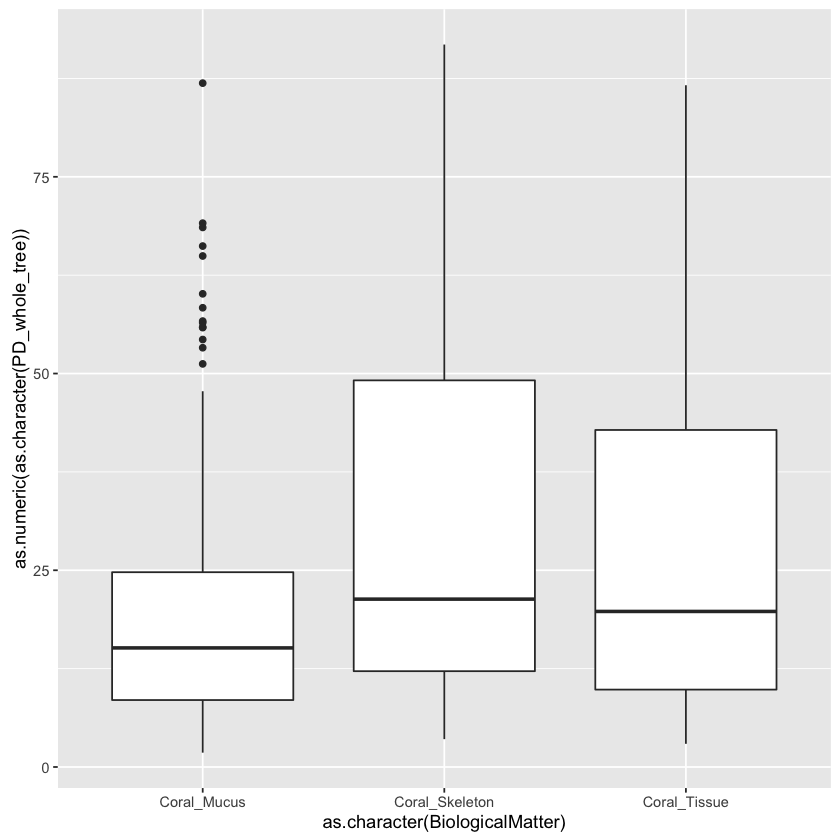

In [29]:
#PD_whole_tree~compartment
library(ggplot2)
ggplot(data_scleractinia_compartments, aes(as.character(BiologicalMatter), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_boxplot()

summary(aov(PD_whole_tree~BiologicalMatter, data = data_scleractinia_compartments))
TukeyHSD(aov(PD_whole_tree~BiologicalMatter, data = data_scleractinia_compartments))

                  Df   Sum Sq Mean Sq F value  Pr(>F)    
BiologicalMatter   2   826008  413004   19.55 5.9e-09 ***
Residuals        611 12909121   21128                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = observed_otus ~ BiologicalMatter, data = data_scleractinia_compartments)

$BiologicalMatter
                                 diff       lwr        upr     p adj
Coral_Skeleton-Coral_Mucus   89.18968  55.66239 122.716979 0.0000000
Coral_Tissue-Coral_Mucus     46.98677  13.08342  80.890120 0.0034116
Coral_Tissue-Coral_Skeleton -42.20291 -76.06629  -8.339533 0.0098890


ERROR: Error in file(con, "rb"): cannot open the connection


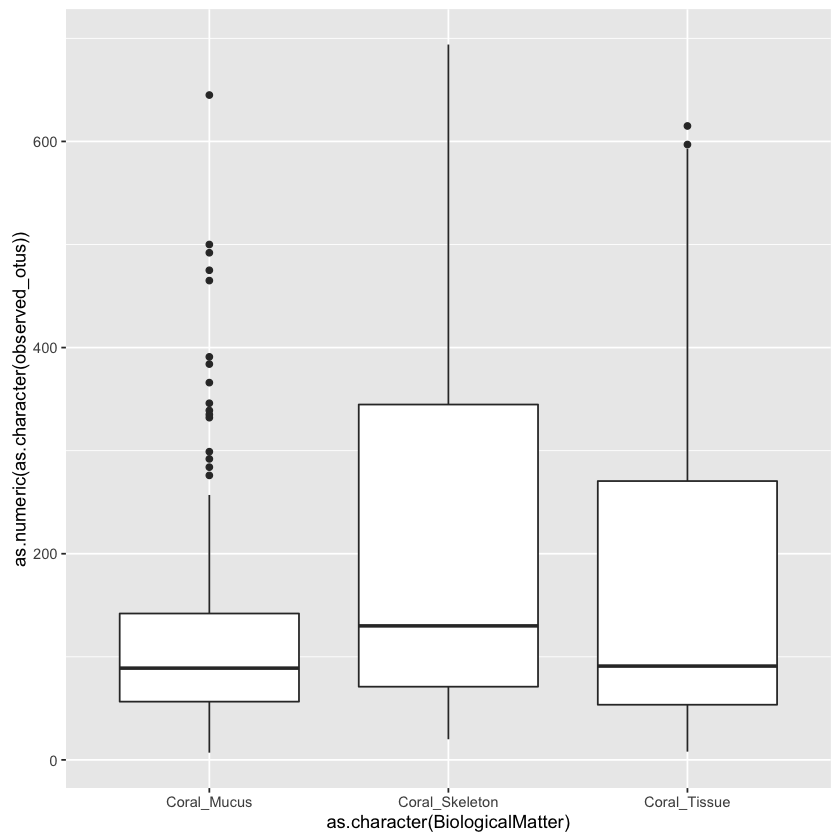

In [30]:
#observed_otus~compartment
library(ggplot2)
ggplot(data_scleractinia_compartments, aes(as.character(BiologicalMatter), y=as.numeric(as.character(observed_otus)))) +
    geom_boxplot()

summary(aov(observed_otus~BiologicalMatter, data = data_scleractinia_compartments))
TukeyHSD(aov(observed_otus~BiologicalMatter, data = data_scleractinia_compartments))

In [38]:
#observed_otus~compartment (calculate means and standard errors)
for (i in unique(data_scleractinia_compartments$BiologicalMatter)){
    cat("Category: ",i, "Mean: ",mean(subset(data_scleractinia_compartments, BiologicalMatter == i)$observed_otus)," SE:",sd(subset(data_scleractinia_compartments, BiologicalMatter == i)$observed_otus)/sqrt(length(subset(data_scleractinia_compartments, BiologicalMatter == i)$observed_otus)),"\n")
}

Category:  Coral_Mucus Mean:  119.5459  SE: 6.808226 
Category:  Coral_Skeleton Mean:  208.7356  SE: 11.89385 
Category:  Coral_Tissue Mean:  166.5327  SE: 11.08513 


                  Df    Sum Sq Mean Sq F value  Pr(>F)    
BiologicalMatter   2  13514145 6757072   25.89 1.6e-11 ***
Residuals        611 159436778  260944                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Chao1 ~ BiologicalMatter, data = data_scleractinia_compartments)

$BiologicalMatter
                                 diff        lwr       upr     p adj
Coral_Skeleton-Coral_Mucus   360.8883  243.06142 478.71521 0.0000000
Coral_Tissue-Coral_Mucus     184.5215   65.37299 303.66996 0.0008673
Coral_Tissue-Coral_Skeleton -176.3668 -295.37486 -57.35882 0.0015456


ERROR: Error in file(con, "rb"): cannot open the connection


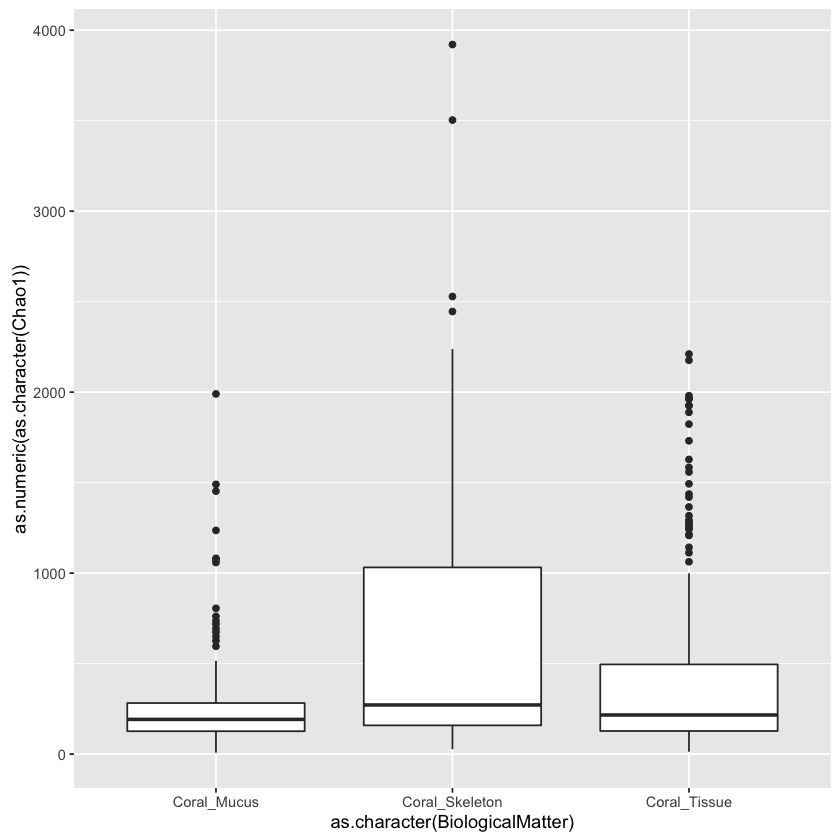

In [31]:
#Chao1~compartment
library(ggplot2)
ggplot(data_scleractinia_compartments, aes(as.character(BiologicalMatter), y=as.numeric(as.character(Chao1)))) +
    geom_boxplot()

summary(aov(Chao1~BiologicalMatter, data = data_scleractinia_compartments))
TukeyHSD(aov(Chao1~BiologicalMatter, data = data_scleractinia_compartments))

# Is coral size correlated with microbiome diversity?

[1] "Pearson's Product Moment Correlation"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_size$PD_whole_tree))
t = -2.4851, df = 642, p-value = 0.01321
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.17356130 -0.02050553
sample estimates:
        cor 
-0.09761054 


ERROR: Error in file(con, "rb"): cannot open the connection


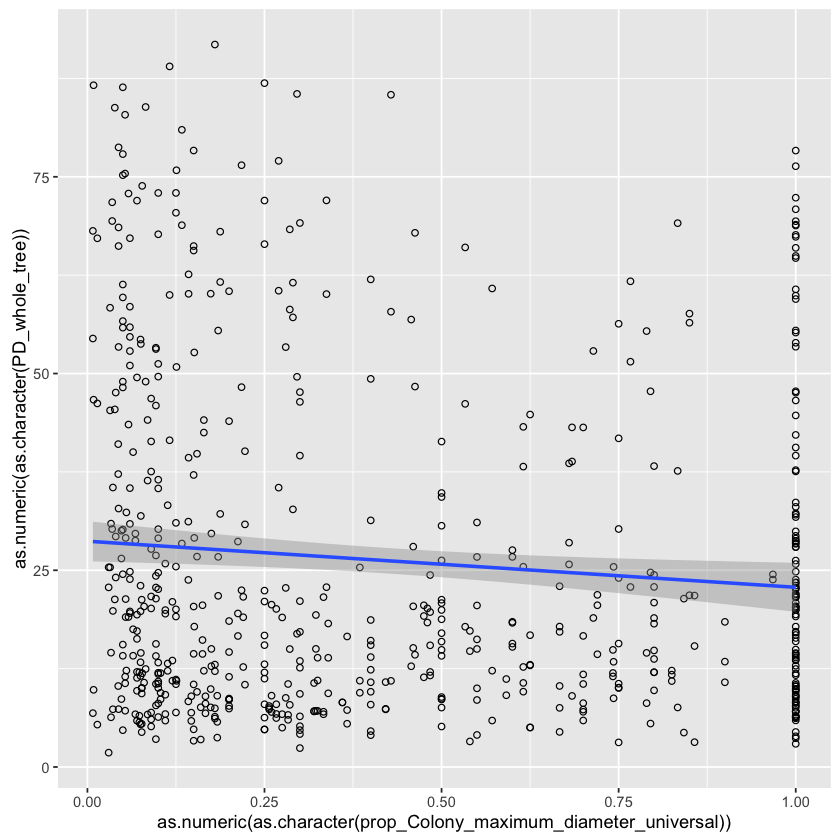

In [10]:
#PD_whole_tree~prop_Colony_maximum_diameter_universal
library(ggplot2)
ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

print("Pearson's Product Moment Correlation")
cor.test(as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_size$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ERROR: Error in file(con, "rb"): cannot open the connection


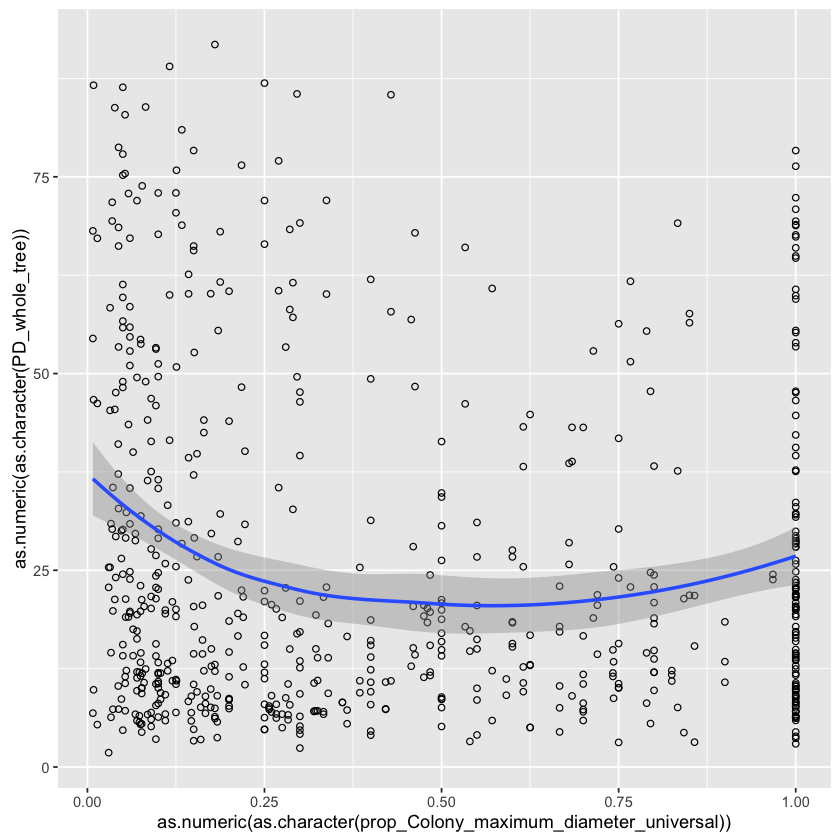

In [6]:
#Also try fitting a non-linear model
#PD_whole_tree~prop_Colony_maximum_diameter_universal
library(ggplot2)
ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

# Overall, there is a correlation between size and bacterial diversity
# Let's break it down by compartment

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -2.6445, df = 201, p-value = 0.008828
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.31316685 -0.04683771
sample estimates:
       cor 
-0.1833648 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = 0.061401, df = 210, p-value = 0.9511
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1305865  0.1389067
sample estimates:
       cor 
0.00423703 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = -1.7363, df = 210, p-value = 0.08398
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.24971047  0.01604171
sample estimates:
       cor 
-0.1189644 


ERROR: Error in file(con, "rb"): cannot open the connection


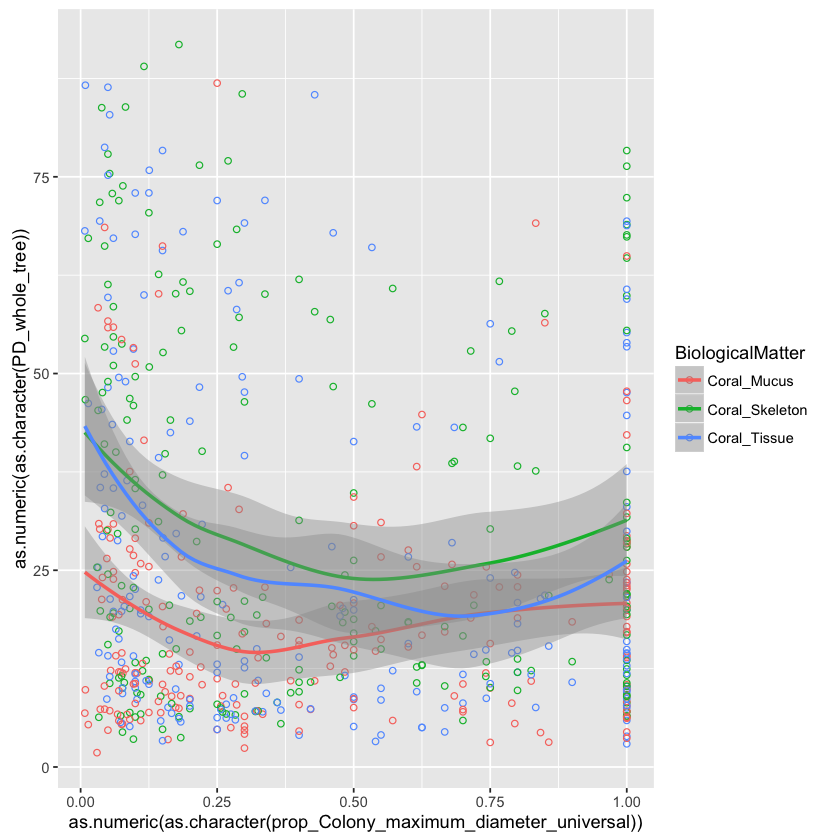

In [17]:
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

library(ggplot2)
ggplot(data_no_unknown_all_coral, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -3.7112, df = 169, p-value = 0.0002797
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4077847 -0.1297859
sample estimates:
       cor 
-0.2745116 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = -0.61429, df = 173, p-value = 0.5398
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1936555  0.1023992
sample estimates:
        cor 
-0.04665261 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = -2.5837, df = 174, p-value = 0.0106
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.33073234 -0.04559209
sample estimates:
       cor 
-0.1922159 


ERROR: Error in file(con, "rb"): cannot open the connection


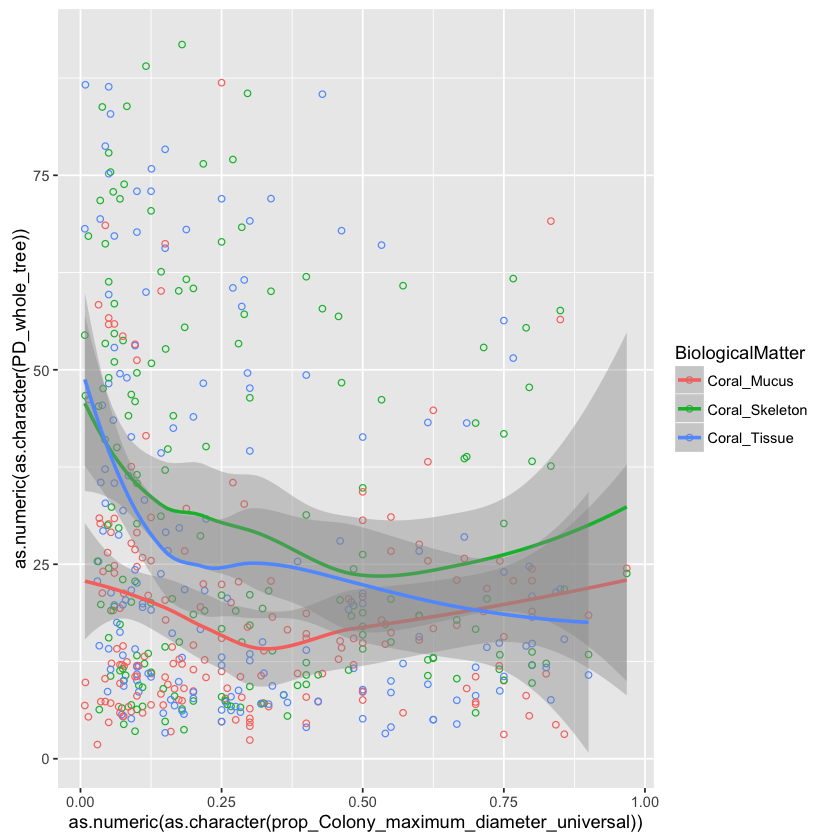

In [51]:
# Let's try excluding 100% size since this could be impacted by the species we only have a few samples from...
subset(data_no_unknown_size, prop_Colony_maximum_diameter_universal != "1")->data_no_unknown_no_1
subset(data_no_unknown_no_1, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_no_1, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
subset(data_no_unknown_no_1, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
subset(data_no_unknown_no_1, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

library(ggplot2)
ggplot(data_no_unknown_all_coral, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

In [ ]:
# Excluding 100% does not make much difference.

# Let's break it down by functional group

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_competitive$PD_whole_tree))
t = -1.2695, df = 74, p-value = 0.2082
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.35961435  0.08216432
sample estimates:
       cor 
-0.1459957 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_generalist$PD_whole_tree))
t = 0.32041, df = 45, p-value = 0.7501
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2427836  0.3303503
sample estimates:
       cor 
0.04770947 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant$PD_whole_tree))
t = -4.0932, df = 258, p-value = 5.695e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3578437 -0.1291667
sample estimates:
       cor 
-0.2469401 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_weedy$PD_whole_tree))
t = -1.638, df = 65, p-value = 0.1062
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4192612  0.0431688
sample estimates:
       cor 
-0.1991044 


ERROR: Error in file(con, "rb"): cannot open the connection


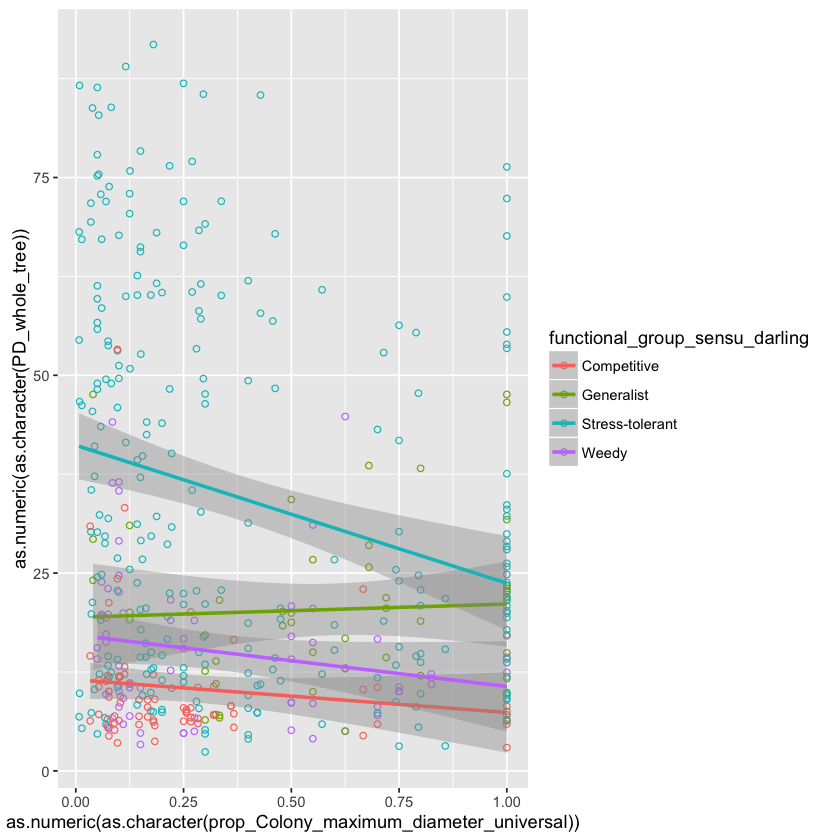

In [14]:
#PD_whole_tree~functional_group
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Competitive")->data_no_unknown_competitive
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Generalist")->data_no_unknown_generalist
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_stress_tolerant
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Weedy")->data_no_unknown_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_size_or_functional_group, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_competitive$observed_otus))
t = -1.1873, df = 74, p-value = 0.2389
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.35134740  0.09155567
sample estimates:
       cor 
-0.1367221 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_generalist$observed_otus))
t = -0.2438, df = 45, p-value = 0.8085
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3201477  0.2534907
sample estimates:
        cor 
-0.03632003 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant$observed_otus))
t = -4.2975, df = 258, p-value = 2.449e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3685286 -0.1412502
sample estimates:
       cor 
-0.2584625 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_weedy$observed_otus))
t = -1.424, df = 65, p-value = 0.1592
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.39753310  0.06916481
sample estimates:
       cor 
-0.1739335 


ERROR: Error in file(con, "rb"): cannot open the connection


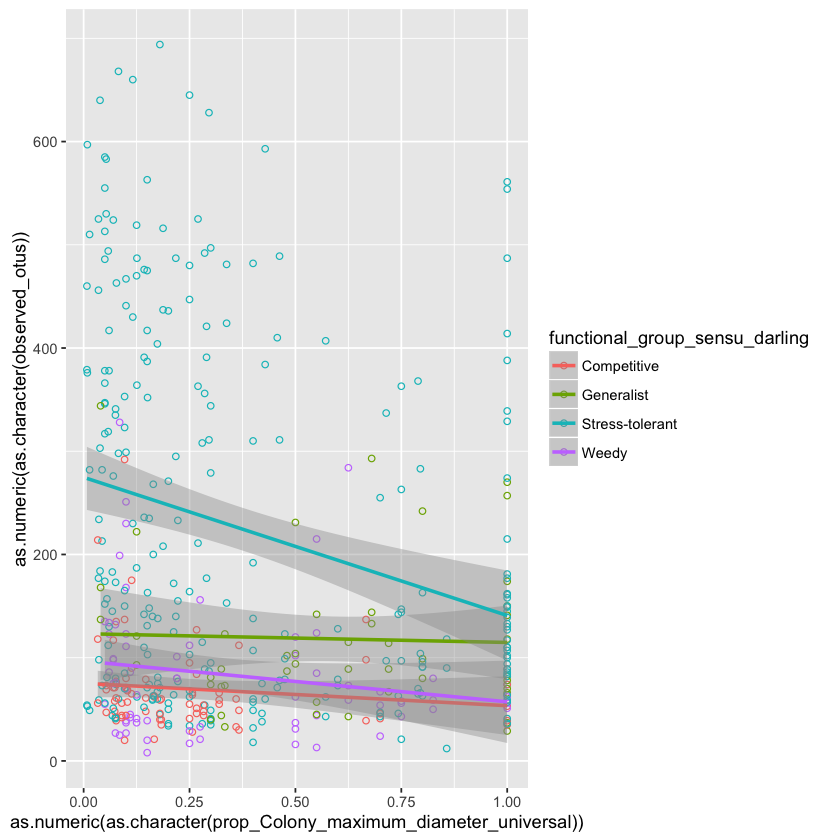

In [32]:
#observed_otus~functional_group
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Competitive")->data_no_unknown_competitive
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Generalist")->data_no_unknown_generalist
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_stress_tolerant
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Weedy")->data_no_unknown_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_competitive$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_generalist$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_weedy$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_size_or_functional_group, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(observed_otus)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_competitive$Chao1))
t = -1.9333, df = 74, p-value = 0.05703
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.423774622  0.006508803
sample estimates:
       cor 
-0.2192685 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_generalist$Chao1))
t = -0.10651, df = 45, p-value = 0.9156
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3016673  0.2725335
sample estimates:
        cor 
-0.01587582 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant$Chao1))
t = -3.8618, df = 258, p-value = 0.0001424
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3455876 -0.1153895
sample estimates:
       cor 
-0.2337617 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_weedy$Chao1))
t = -1.4668, df = 65, p-value = 0.1473
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.40192072  0.06396594
sample estimates:
       cor 
-0.1789929 


ERROR: Error in file(con, "rb"): cannot open the connection


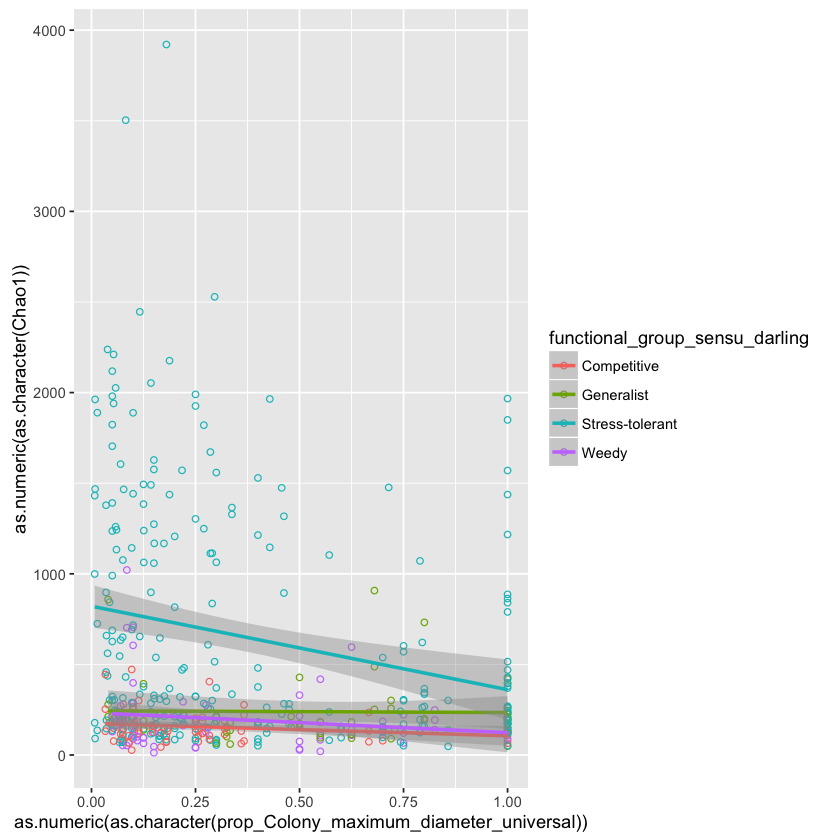

In [33]:
#Chao1~functional_group
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Competitive")->data_no_unknown_competitive
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Generalist")->data_no_unknown_generalist
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_stress_tolerant
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Weedy")->data_no_unknown_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_competitive$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_generalist$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_weedy$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_size_or_functional_group, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(Chao1)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

ERROR: Error in file(con, "rb"): cannot open the connection


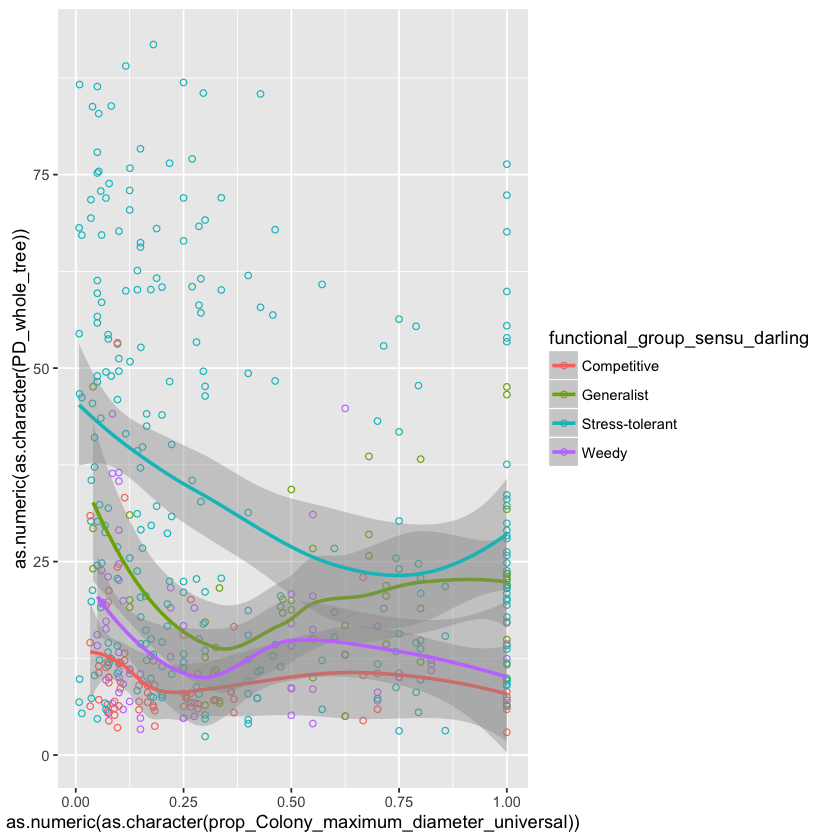

In [7]:
#Also try a non-linear model
ggplot(data_no_unknown_size_or_functional_group, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

# Let's break it down by compartment and functional group

# Functional group by by compartment (Tissue)

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_competitive$PD_whole_tree))
t = -1.9087, df = 23, p-value = 0.06885
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.66740065  0.02968144
sample estimates:
       cor 
-0.3697863 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_generalist$PD_whole_tree))
t = 0.10701, df = 14, p-value = 0.9163
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4738319  0.5169675
sample estimates:
       cor 
0.02858833 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$PD_whole_tree))
t = -4.0212, df = 80, p-value = 0.0001303
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5758154 -0.2118938
sample estimates:
      cor 
-0.410046 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_weedy$PD_whole_tree))
t = -2.0341, df = 21, p-value = 0.05476
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.700726512  0.007795899
sample estimates:
     cor 
-0.40571 


ERROR: Error in file(con, "rb"): cannot open the connection


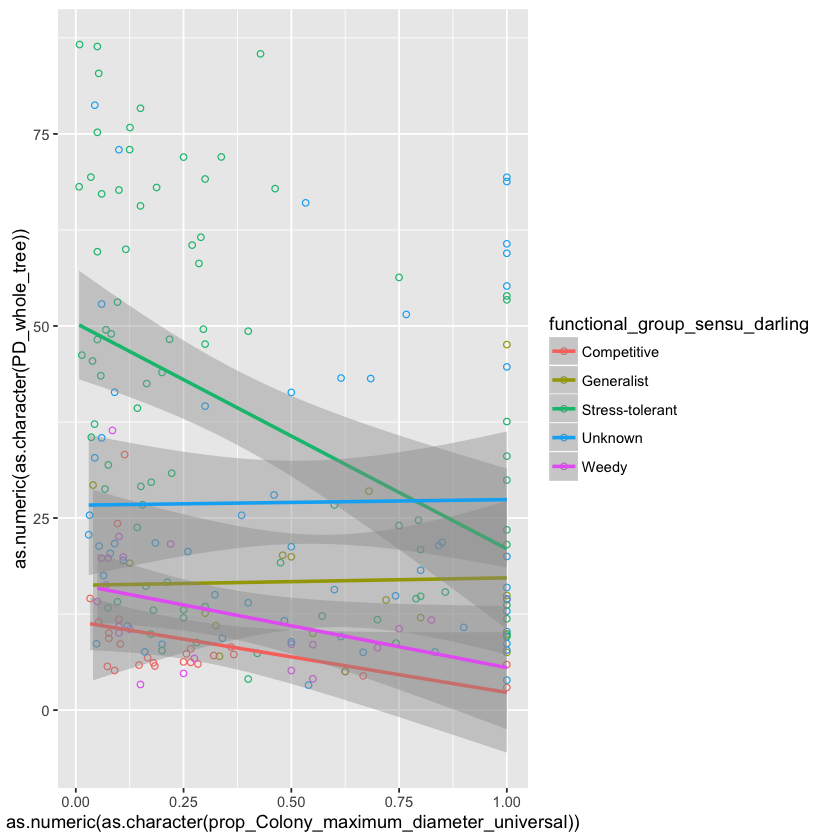

In [7]:
# PD_whole_tree~functional_group (tissue-only)
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral


subset(data_no_unknown_tissue, functional_group_sensu_darling == "Competitive")->data_no_unknown_tissue_competitive
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Generalist")->data_no_unknown_tissue_generalist
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_tissue_stress_tolerant
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Weedy")->data_no_unknown_tissue_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_competitive$observed_otus))
t = -2.0919, df = 23, p-value = 0.04769
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.68648869 -0.00555275
sample estimates:
       cor 
-0.3998064 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_generalist$observed_otus))
t = -0.057395, df = 14, p-value = 0.955
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5071870  0.4840478
sample estimates:
        cor 
-0.01533777 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$observed_otus))
t = -3.8442, df = 80, p-value = 0.0002414
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5635851 -0.1945340
sample estimates:
       cor 
-0.3948715 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_weedy$observed_otus))
t = -1.6259, df = 21, p-value = 0.1189
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.65613972  0.09027148
sample estimates:
       cor 
-0.3343727 


ERROR: Error in file(con, "rb"): cannot open the connection


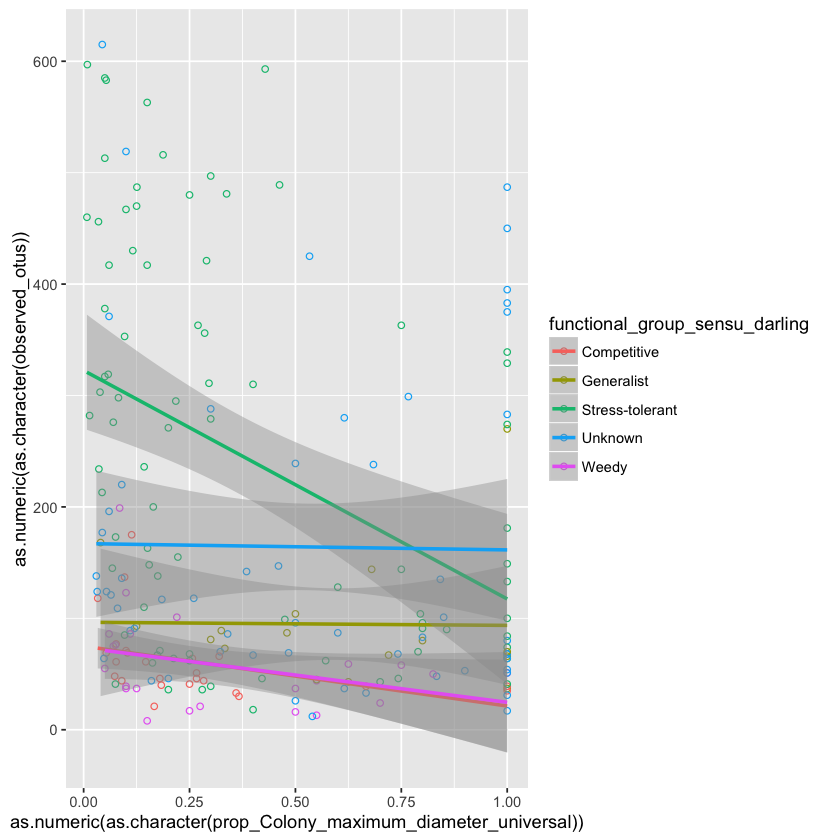

In [34]:
# observed_otus~functional_group (tissue-only)
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral


subset(data_no_unknown_tissue, functional_group_sensu_darling == "Competitive")->data_no_unknown_tissue_competitive
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Generalist")->data_no_unknown_tissue_generalist
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_tissue_stress_tolerant
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Weedy")->data_no_unknown_tissue_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_competitive$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_generalist$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_weedy$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(observed_otus)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_competitive$Chao1))
t = -2.2786, df = 23, p-value = 0.0323
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.70476812 -0.04095728
sample estimates:
       cor 
-0.4291431 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_generalist$Chao1))
t = 0.77452, df = 14, p-value = 0.4515
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3257342  0.6346379
sample estimates:
      cor 
0.2027009 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$Chao1))
t = -3.0965, df = 80, p-value = 0.0027
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5080864 -0.1185602
sample estimates:
       cor 
-0.3271503 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_weedy$Chao1))
t = -1.2451, df = 21, p-value = 0.2268
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6086168  0.1681879
sample estimates:
       cor 
-0.2621914 


ERROR: Error in file(con, "rb"): cannot open the connection


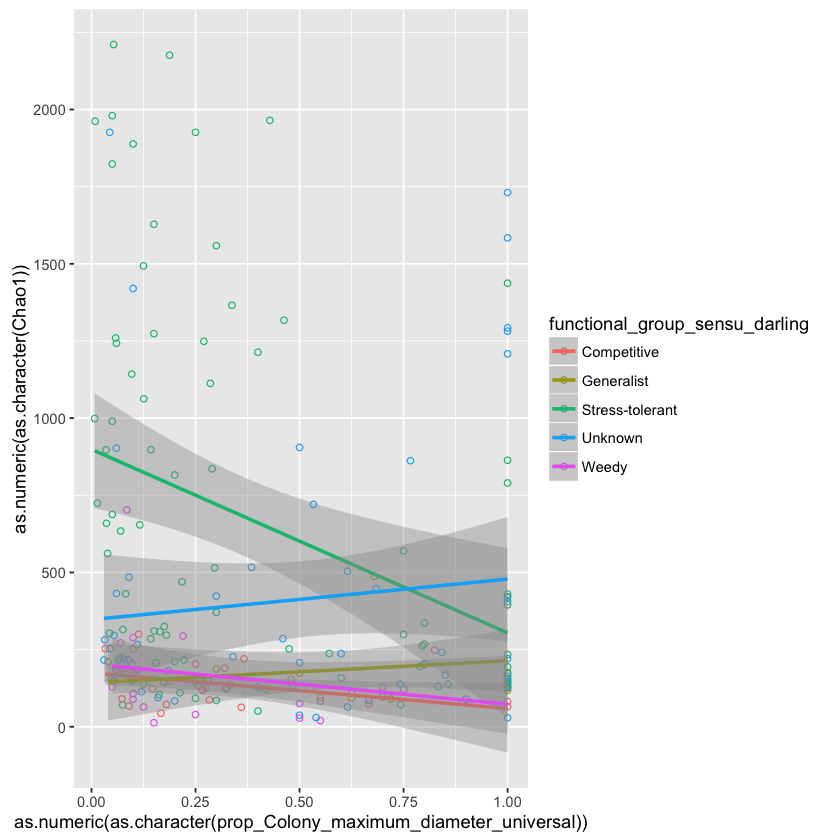

In [35]:
# Chao1~functional_group (tissue-only)
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral


subset(data_no_unknown_tissue, functional_group_sensu_darling == "Competitive")->data_no_unknown_tissue_competitive
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Generalist")->data_no_unknown_tissue_generalist
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_tissue_stress_tolerant
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Weedy")->data_no_unknown_tissue_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_competitive$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_generalist$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_weedy$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(Chao1)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton_competitive$PD_whole_tree))
t = -0.27269, df = 24, p-value = 0.7874
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4335936  0.3390756
sample estimates:
        cor 
-0.05557574 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton_generalist$PD_whole_tree))
t = -0.61025, df = 14, p-value = 0.5515
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6081484  0.3637618
sample estimates:
       cor 
-0.1609693 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton_stress_tolerant$PD_whole_tree))
t = -2.8285, df = 88, p-value = 0.005791
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4678067 -0.0867797
sample estimates:
       cor 
-0.2886828 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton_weedy$PD_whole_tree))
t = -1.7035, df = 20, p-value = 0.104
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.67610725  0.07723064
sample estimates:
       cor 
-0.3559685 


ERROR: Error in file(con, "rb"): cannot open the connection


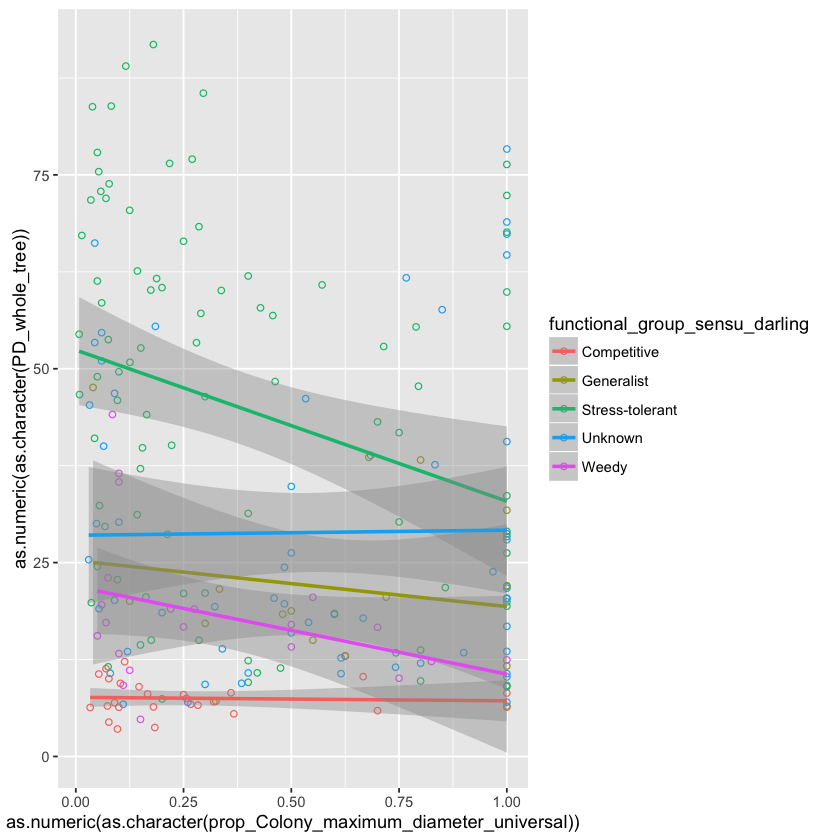

In [9]:
# Skeleton-only
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral


subset(data_no_unknown_skeleton, functional_group_sensu_darling == "Competitive")->data_no_unknown_skeleton_competitive
subset(data_no_unknown_skeleton, functional_group_sensu_darling == "Generalist")->data_no_unknown_skeleton_generalist
subset(data_no_unknown_skeleton, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_skeleton_stress_tolerant
subset(data_no_unknown_skeleton, functional_group_sensu_darling == "Weedy")->data_no_unknown_skeleton_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_skeleton_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_skeleton_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_skeleton_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_skeleton_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_skeleton, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus_competitive$PD_whole_tree))
t = -0.43822, df = 23, p-value = 0.6653
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4692545  0.3154783
sample estimates:
        cor 
-0.09099572 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus_generalist$PD_whole_tree))
t = 1.2042, df = 13, p-value = 0.25
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2333355  0.7133007
sample estimates:
      cor 
0.3167933 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus_stress_tolerant$PD_whole_tree))
t = -0.95705, df = 86, p-value = 0.3412
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3055297  0.1091321
sample estimates:
       cor 
-0.1026566 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus_weedy$PD_whole_tree))
t = 0.43012, df = 20, p-value = 0.6717
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3395796  0.4972724
sample estimates:
       cor 
0.09573526 


ERROR: Error in file(con, "rb"): cannot open the connection


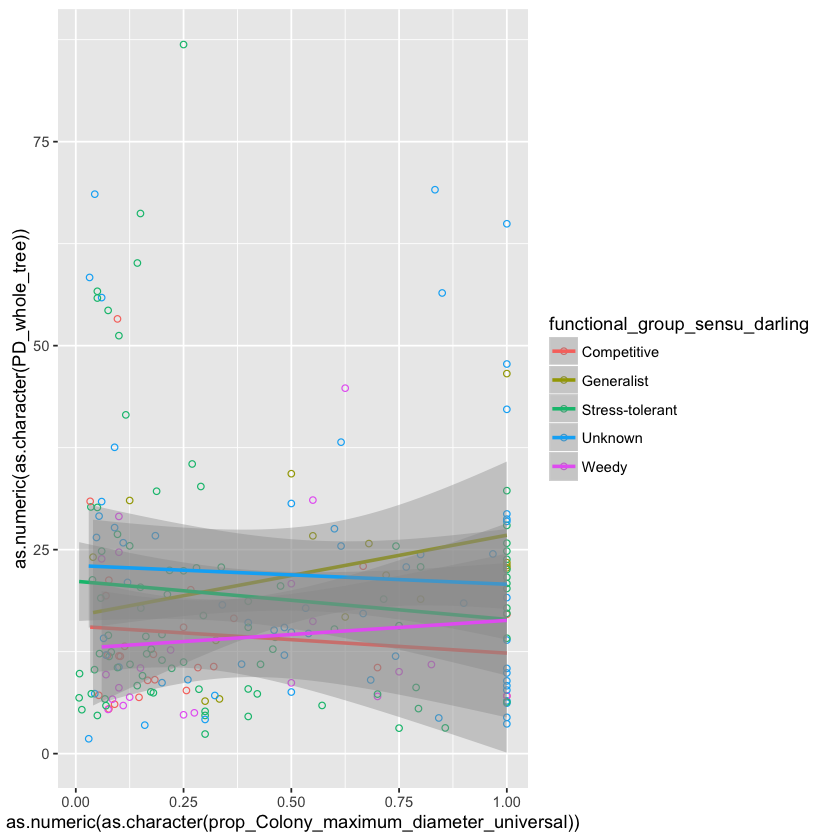

In [10]:
# Mucus-only
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
#subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral


subset(data_no_unknown_mucus, functional_group_sensu_darling == "Competitive")->data_no_unknown_mucus_competitive
subset(data_no_unknown_mucus, functional_group_sensu_darling == "Generalist")->data_no_unknown_mucus_generalist
subset(data_no_unknown_mucus, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_mucus_stress_tolerant
subset(data_no_unknown_mucus, functional_group_sensu_darling == "Weedy")->data_no_unknown_mucus_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_mucus_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_mucus_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_mucus_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_mucus_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_mucus, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Most pronounced for stress-tolerant. Does this hold for all compartments w/in stress-tolerant?

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$PD_whole_tree))
t = -4.0212, df = 80, p-value = 0.0001303
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5758154 -0.2118938
sample estimates:
      cor 
-0.410046 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$PD_whole_tree))
t = -0.95705, df = 86, p-value = 0.3412
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3055297  0.1091321
sample estimates:
       cor 
-0.1026566 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$PD_whole_tree))
t = -2.8285, df = 88, p-value = 0.005791
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4678067 -0.0867797
sample estimates:
       cor 
-0.2886828 


ERROR: Error in file(con, "rb"): cannot open the connection


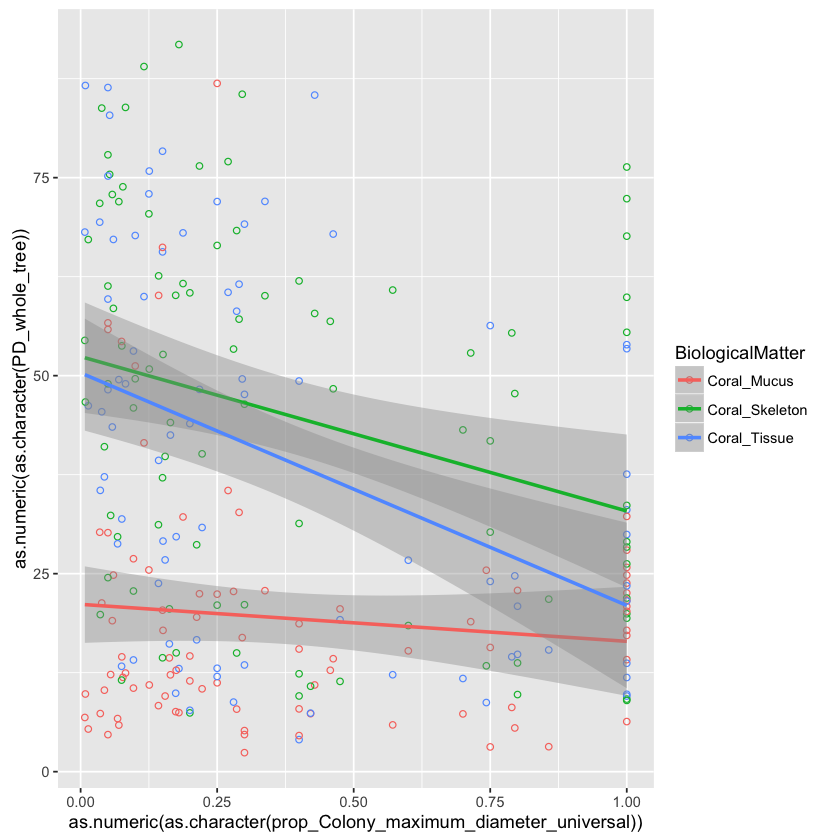

In [24]:
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral_Tissue")->data_no_unknown_stress_tolerant_tissue
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral_Mucus")->data_no_unknown_stress_tolerant_mucus
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_stress_tolerant_skeleton

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

library(ggplot2)
ggplot(data_no_unknown_stress_tolerant, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

ERROR: Error in file(con, "rb"): cannot open the connection


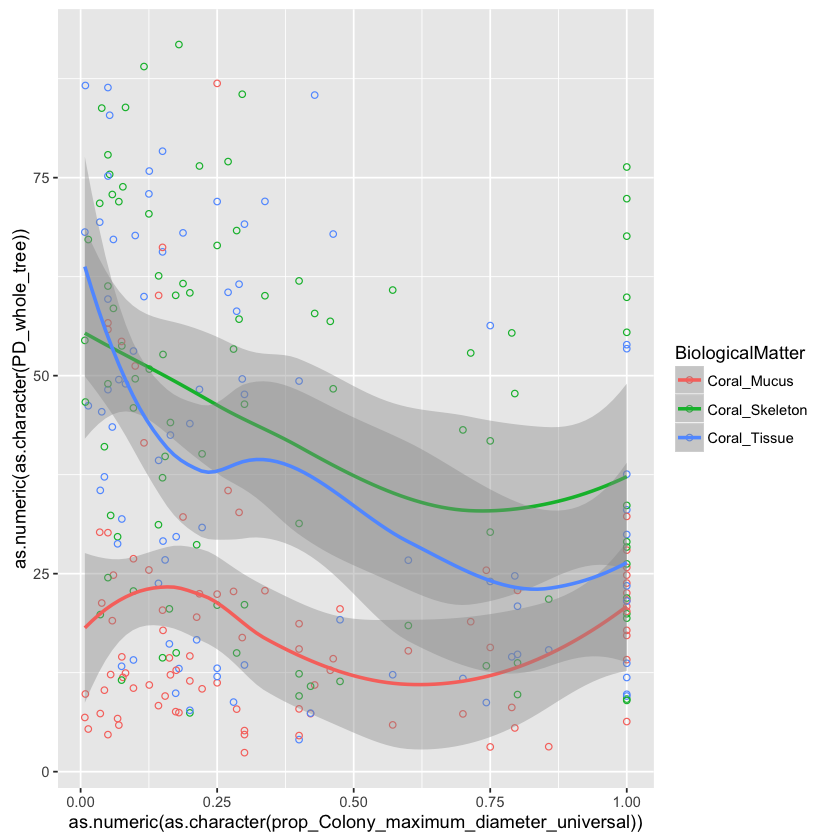

In [10]:
subset(data_no_unknown_size_or_functional_group, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_stress_tolerant

subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral_Tissue")->data_no_unknown_stress_tolerant_tissue
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral_Mucus")->data_no_unknown_stress_tolerant_mucus
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_stress_tolerant_skeleton
#Try non-linear
library(ggplot2)
ggplot(data_no_unknown_stress_tolerant, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

# Correlation between size and richness seems to be largely driven by reductions in microbial diversity within tissues and skeleton of larger (presumably older) corals or, potentially more likely based on comparisons to other fucntional groups, elevations in richness among young colonies.
# Not surprisingly, this trend does not hold for mucus, which would presumably be more influenced by surrounding seawater

# If we only look at tissue, do we see this in other groups?


# Within Tissue, do we see correlations between richness and size in different functional groups?

[1] "Tissue: Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_competitive$PD_whole_tree))
t = -1.9087, df = 23, p-value = 0.06885
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.66740065  0.02968144
sample estimates:
       cor 
-0.3697863 


[1] "Tissue: Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_generalist$PD_whole_tree))
t = 0.10701, df = 14, p-value = 0.9163
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4738319  0.5169675
sample estimates:
       cor 
0.02858833 


[1] "Tissue: Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$PD_whole_tree))
t = -4.0212, df = 80, p-value = 0.0001303
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5758154 -0.2118938
sample estimates:
      cor 
-0.410046 


[1] "Tissue: Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_weedy$PD_whole_tree))
t = -2.0341, df = 21, p-value = 0.05476
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.700726512  0.007795899
sample estimates:
     cor 
-0.40571 


ERROR: Error in file(con, "rb"): cannot open the connection


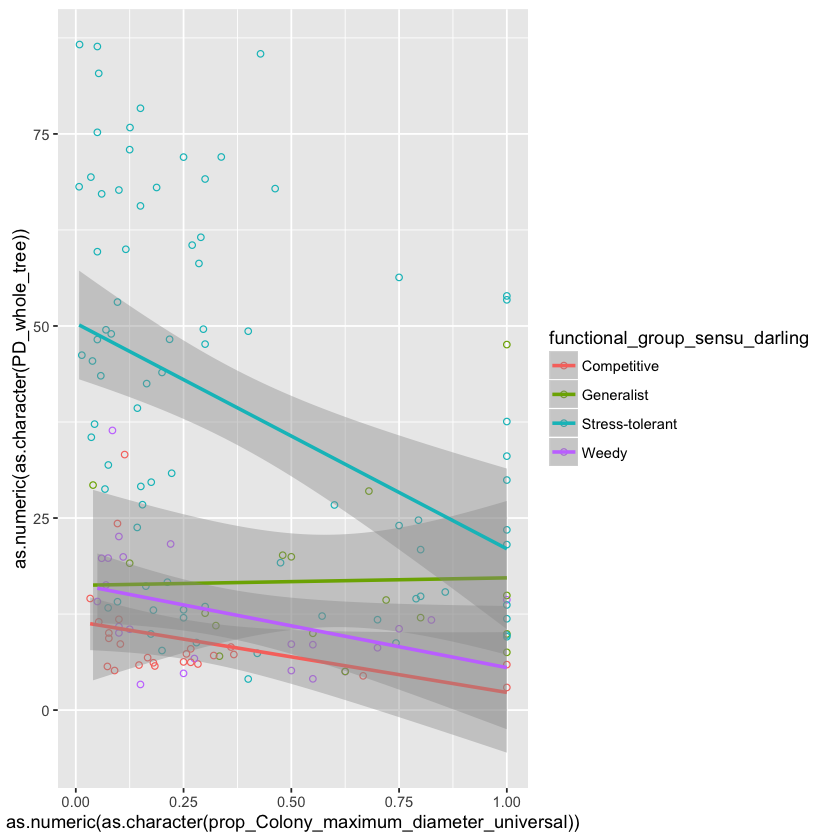

In [26]:
subset(data_no_unknown_size_or_functional_group, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Competitive")->data_no_unknown_tissue_competitive
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Generalist")->data_no_unknown_tissue_generalist
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_tissue_stress_tolerant
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Weedy")->data_no_unknown_tissue_weedy

print("Tissue: Competitive")
cor.test(as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Tissue: Generalist")
cor.test(as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Tissue: Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Tissue: Weedy")
cor.test(as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Within tissue, all functional groups seem to have a negative trend with size, but only significant for Stress-Tolerant and competitive

# For all Functional Groups, does correlation between size and diversity hold for all tissues combined?

In [27]:
subset(data_no_unknown_size_or_functional_group, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_size_or_functional_group, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
subset(data_no_unknown_size_or_functional_group, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -3.2558, df = 144, p-value = 0.00141
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4069849 -0.1038160
sample estimates:
       cor 
-0.2618484 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = -0.081684, df = 148, p-value = 0.935
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1667963  0.1537127
sample estimates:
         cor 
-0.006714225 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = -1.8488, df = 152, p-value = 0.06642
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.29943977  0.01009479
sample estimates:
       cor 
-0.1483027 


ERROR: Error in ggplot(data_no_unknown, aes(x = as.numeric(as.character(prop_Colony_maximum_diameter_universal)), : object 'data_no_unknown' not found


# As a whole, coral tissue microbial diversity is negatively correlated with size

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -3.2558, df = 144, p-value = 0.00141
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4069849 -0.1038160
sample estimates:
       cor 
-0.2618484 


ERROR: Error in file(con, "rb"): cannot open the connection


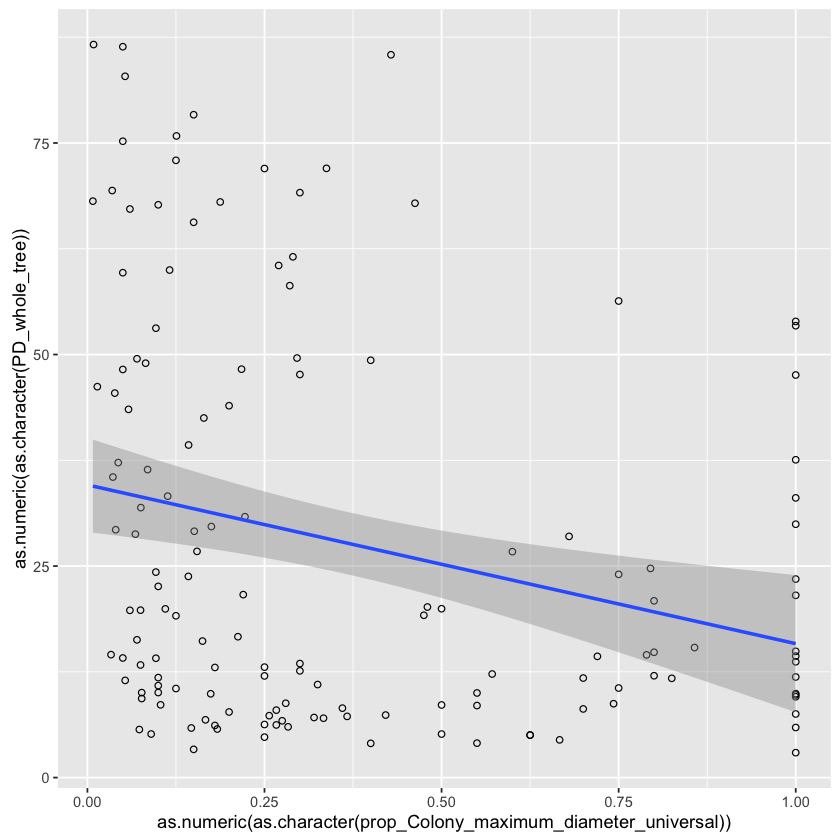

In [29]:
subset(data_no_unknown_size_or_functional_group, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue


print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Is the correlation between coral size and microbial diversity in tissues driven by any particular taxa?

In [31]:
subset(data_no_unknown_size_or_functional_group, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue

for (genus in unique(data_no_unknown_tissue$field_host_genus_id)){
    subset(data_no_unknown_tissue, field_host_genus_id == genus)->data_no_unknown_tissue_loop
    print(paste0("Genus: ", genus,", Replicates: ",nrow(data_no_unknown_tissue_loop)))
    if(nrow(data_no_unknown_tissue_loop)<4) next
    print(cor.test(as.numeric(as.character(data_no_unknown_tissue_loop$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_loop$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95))
}

[1] "Genus: Pachyseris, Replicates: 8"

	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_loop$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_loop$PD_whole_tree))
t = 0.62355, df = 6, p-value = 0.5559
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5543456  0.8104751
sample estimates:
      cor 
0.2466939 

[1] "Genus: Caulastrea, Replicates: 1"
[1] "Genus: Favites, Replicates: 7"

	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_loop$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_loop$PD_whole_tree))
t = -0.58016, df = 5, p-value = 0.587
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8444867  0.6189811
sample estimates:
       cor 
-0.2511411 

[1] "Genus: Lobophyllia, Replicates: 2"
[1] "Genus: Acropora, Replicates: 

# Stylophora is only significant correlation (Pocillopora is close). Sample sizes of individual genera are too low for much power.

[1] "Pocillopora"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_pocillopora$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_pocillopora$PD_whole_tree))
t = -2.1471, df = 24, p-value = 0.0421
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.68262775 -0.01665527
sample estimates:
       cor 
-0.4014175 


ERROR: Error in file(con, "rb"): cannot open the connection


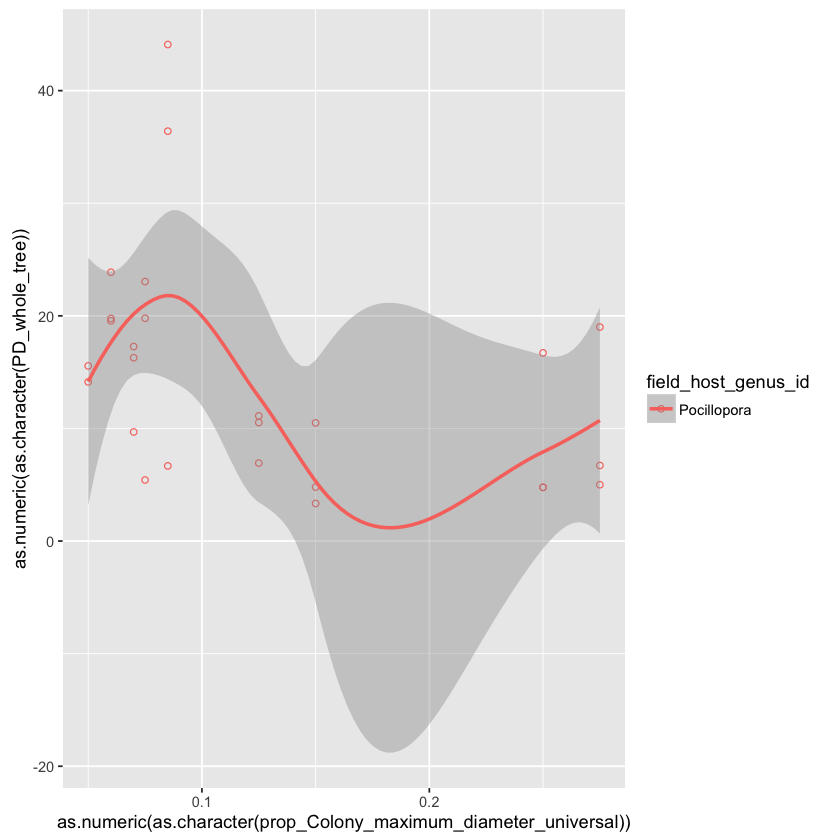

In [8]:
subset(data_no_unknown_size, field_host_genus_id == "Pocillopora")->data_no_unknown_pocillopora

print("Pocillopora")
cor.test(as.numeric(as.character(data_no_unknown_pocillopora$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_pocillopora$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_pocillopora, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

[1] "Acropora"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_acropora$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_acropora$PD_whole_tree))
t = -1.2695, df = 74, p-value = 0.2082
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.35961435  0.08216432
sample estimates:
       cor 
-0.1459957 


[1] "Diploastrea"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_diploastrea$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_diploastrea$PD_whole_tree))
t = -1.2731, df = 68, p-value = 0.2073
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.37414145  0.08545647
sample estimates:
       cor 
-0.1525814 


ERROR: Error in file(con, "rb"): cannot open the connection


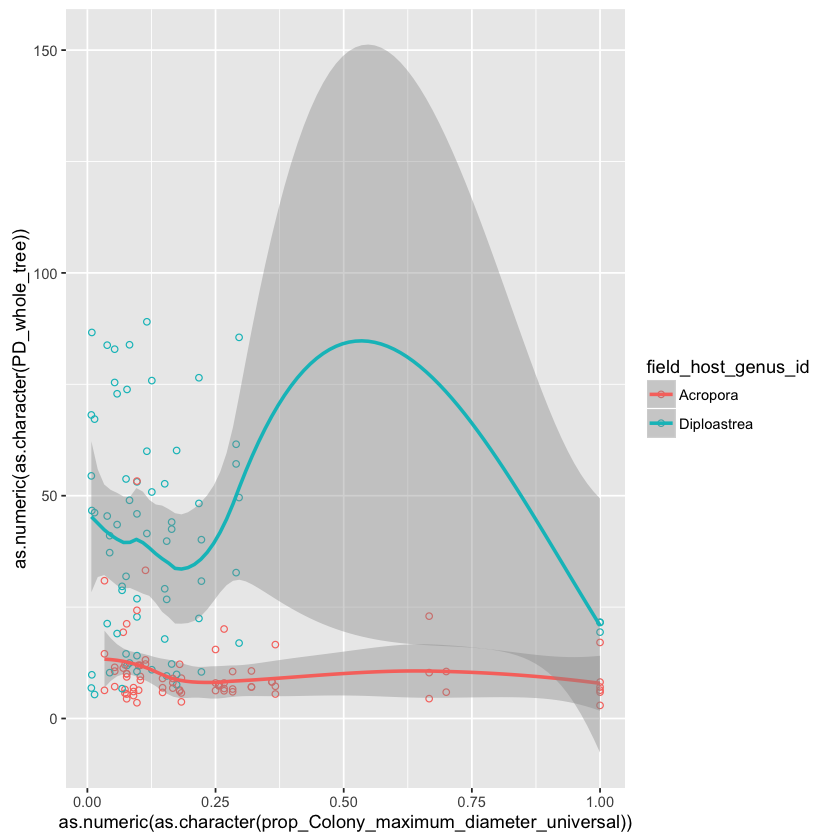

In [7]:
#How about in Acropora and Diploastrea
subset(data_no_unknown_size, field_host_genus_id == "Acropora")->data_no_unknown_acropora
subset(data_no_unknown_size, field_host_genus_id == "Diploastrea")->data_no_unknown_diploastrea
subset(data_no_unknown_size,  field_host_genus_id == "Acropora" |  field_host_genus_id == "Diploastrea")->data_no_unknown_acropora_and_diploastrea

print("Acropora")
cor.test(as.numeric(as.character(data_no_unknown_acropora$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_acropora$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Diploastrea")
cor.test(as.numeric(as.character(data_no_unknown_diploastrea$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_diploastrea$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_acropora_and_diploastrea, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

# LATITUDINAL DIVERSITY HYPOTHESIS
# Let's explore the lat. diversity hypothesis

# Is there an overall reduction in diversity as we head poleward?

In [10]:
#Import the data
read.csv('output/microbiome_age_v2.csv', header=T)->data
head(data)

X.SampleID PD_whole_tree observed_otus     Chao1
1 E1.6.Iso.pali.1.20140803.M.2      37.90184           222  558.6000
2 E1.6.Iso.pali.1.20140803.S.2      43.17700           275  541.1429
3 E1.6.Iso.pali.1.20140803.T.2      11.77071            72  237.0000
4           E10.Sed.1.20150627      74.79289           614 2318.7206
5           E10.Sed.1.20150628      86.31142           647 2820.0154
6           E10.Sed.1.20150630      77.96732           633 1653.5093
                      SampleID BarcodeSequence runID    sequence_center_ID
1 E1.6.Iso.pali.1.20140803.M.2      TACACAGTAG ALVCP            Pollock117
2 E1.6.Iso.pali.1.20140803.S.2      CAGTCTACAT ALVCP            Pollock119
3 E1.6.Iso.pali.1.20140803.T.2      TACTGCAGCG ALVCP            Pollock118
4           E10.Sed.1.20150627      GATGTAGCGT AN5UL Pollock377_LH_268_SED
5           E10.Sed.1.20150628      GTATCGTCGT ALVCP              Pollock8
6           E10.Sed.1.20150630      TCTCTGTGCA AN5UL Pollock419_LH_305_SED
  sequence_center_ID_base      collection_id    date concatenated_date
1              Pollock117            Unknown Unknown           Unknown
2              Pollock119            Unknown Unknown           Unknown
3              Pollock118            Unknown Unknown           Unknown
4              Pollock377 North_Bay_20150627 6/27/15          20150627
5                Pollock8 North_Bay_20150628 6/28/15          20150628
6              Pollock419 Far_Flats_20150630 6/30/15          20150630
  reef_name collection_time   collection_timestamp daily_replicate    latitude
1   Unknown         Unknown                Unknown         Unknown     Unknown
2   Unknown         Unknown                Unknown         Unknown     Unknown
3   Unknown         Unknown                Unknown         Unknown     Unknown
4 North_Bay      9:00:00_AM  6/27/2015__9:00:00_AM               1   -31.52135
5 North_Bay      9:10:00_AM  6/28/2015__9:10:00_AM               1   -31.52135
6 Far_Flats     12:10:00_PM 6/30/2015__12:10:00_PM               1 -31.5617667
    longitude substrate   depth temperature salinity  oxygen
1     Unknown   Unknown Unknown     Unknown  Unknown Unknown
2     Unknown   Unknown Unknown     Unknown  Unknown Unknown
3     Unknown   Unknown Unknown     Unknown  Unknown Unknown
4 159.0467333      None     1.3          21  Unknown Unknown
5 159.0467333      None     1.2          21  Unknown Unknown
6   159.07475      None     1.3          21  Unknown Unknown
  photosynthetically_active_radiation PAR_method dna_extracted
1                             Unknown    Unknown       Unknown
2                             Unknown    Unknown       Unknown
3                             Unknown    Unknown       Unknown
4                             Unknown       None             n
5                             Unknown       None             n
6                             Unknown       None             n
  physical_samp_avail_now                       physical_sample_location
1                 Unknown                                        Unknown
2                 Unknown                                        Unknown
3                 Unknown                                        Unknown
4                       y Medina_Lab,_Penn_State,_USA_can_be_reextracted
5                       y Medina_Lab,_Penn_State,_USA_can_be_reextracted
6                       y Medina_Lab,_Penn_State,_USA_can_be_reextracted
    sample_type     env_matter local_colony_name contact_description
1       Unknown        Unknown           Unknown             Unknown
2       Unknown        Unknown           Unknown             Unknown
3       Unknown        Unknown           Unknown             Unknown
4 Reef_Sediment sandy_sediment            WA_268                None
5 Reef_Sediment sandy_sediment            LH_281                None
6 Reef_Sediment sandy_sediment            LH_305                None
  local_sample_id Symbio_ITS2_sequenced field_host_name field_host_genus_id
1         Unknown       

In [11]:
#Subset to include only corals
subset(data, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_corals_only
nrow(data_corals_only)
head(data_corals_only)

[1] 627

X.SampleID PD_whole_tree observed_otus     Chao1
18  E3.4.Pac.spec.1.20150129.M      22.77091           150  230.6400
19  E3.4.Pac.spec.1.20150129.S      11.67265            82  246.0000
20  E3.4.Pac.spec.1.20150129.T      47.57823           270  418.7797
21 E1.11.Lep.tran.1.20140731.M       6.46975            44  109.0000
22 E1.11.Lep.tran.1.20140731.S      67.37217           442 1721.6875
23 E1.11.Lep.tran.1.20140731.T      69.36039           450 1731.0566
                      SampleID BarcodeSequence runID         sequence_center_ID
18  E3.4.Pac.spec.1.20150129.M      GTATAACGCT ALVCP                 Pollock311
19  E3.4.Pac.spec.1.20150129.S      GTGTTCGGTC AN5UL           Pollock665_110_S
20  E3.4.Pac.spec.1.20150129.T      GCAGATAAGT ALVCP                 Pollock310
21 E1.11.Lep.tran.1.20140731.M      GGCATCATGC ALVCP Pollock688_Coel_Muc_140731
22 E1.11.Lep.tran.1.20140731.S      AGGATTGAGG ALVCP                 Pollock334
23 E1.11.Lep.tran.1.20140731.T      CCAGAACAGA ALVCP                 Pollock333
   sequence_center_ID_base          collection_id    date concatenated_date
18              Pollock311 Lagoon_Bommie_20150129 1/29/15          20150129
19              Pollock665 Lagoon_Bommie_20150129 1/29/15          20150129
20              Pollock310 Lagoon_Bommie_20150129 1/29/15          20150129
21              Pollock688     Horseshoe_20140731 7/31/14          20140731
22              Pollock334     Horseshoe_20140731 7/31/14          20140731
23              Pollock333     Horseshoe_20140731 7/31/14          20140731
       reef_name collection_time  collection_timestamp daily_replicate
18 Lagoon_Bommie      9:50:00_AM 1/29/2015__9:50:00_AM               1
19 Lagoon_Bommie      9:50:00_AM 1/29/2015__9:50:00_AM               1
20 Lagoon_Bommie      9:50:00_AM 1/29/2015__9:50:00_AM               1
21     Horseshoe      3:30:00_PM 7/31/2014__3:30:00_PM               1
22     Horseshoe      3:30:00_PM 7/31/2014__3:30:00_PM               1
23     Horseshoe      3:30:00_PM 7/31/2014__3:30:00_PM               1
     latitude  longitude       substrate depth temperature salinity  oxygen
18 -14.687533 145.465467 Reef_edge/wall.   4.6          27  Unknown Unknown
19 -14.687533 145.465467 Reef_edge/wall.   4.6          27  Unknown Unknown
20 -14.687533 145.465467 Reef_edge/wall.   4.6          27  Unknown Unknown
21  -14.68716  145.44449            rock 1.524        23.9  Unknown Unknown
22  -14.68716  145.44449            rock 1.524        23.9  Unknown Unknown
23  -14.68716  145.44449            rock 1.524        23.9  Unknown Unknown
   photosynthetically_active_radiation PAR_method dna_extracted
18                             Unknown    Unknown             y
19                             Unknown    Unknown             y
20                             Unknown    Unknown             y
21                             Unknown       buoy             y
22                             Unknown       buoy             y
23                             Unknown       buoy             y
   physical_samp_avail_now                          physical_sample_location
18                       y    Medina_Lab,_Penn_State,_USA_can_be_reextracted
19                       y    Medina_Lab,_Penn_State,_USA_can_be_reextracted
20                       y    Medina_Lab,_Penn_State,_USA_can_be_reextracted
21                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
22                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
23                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
      sample_type       env_matter              local_colony_name
18    Coral_Mucus            mucus                          110_M
19 Coral_Skeleton organic_material                          110_S
20   Coral_Tissue organic_material                          110_T
21    Coral_Mucus            mucus Leptastrea_transversa_20140731
22 Coral_Skeleton organic_material Leptastrea_transversa_20140731
23   Coral_Tissue organic_materia

ERROR: Error in file(con, "rb"): cannot open the connection


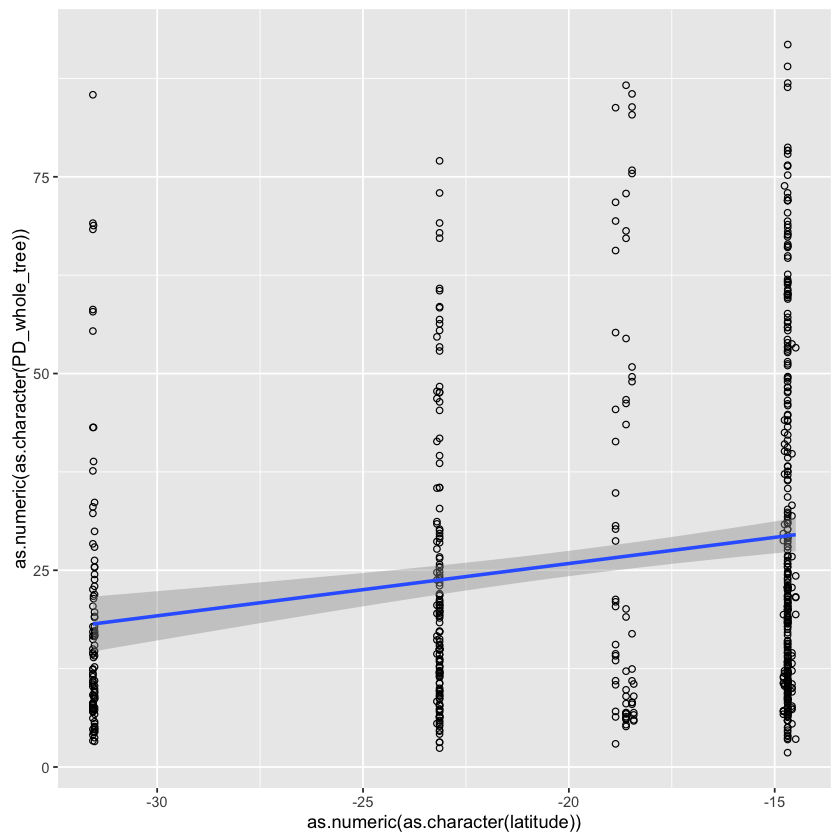

ERROR: Error in file(con, "rb"): cannot open the connection


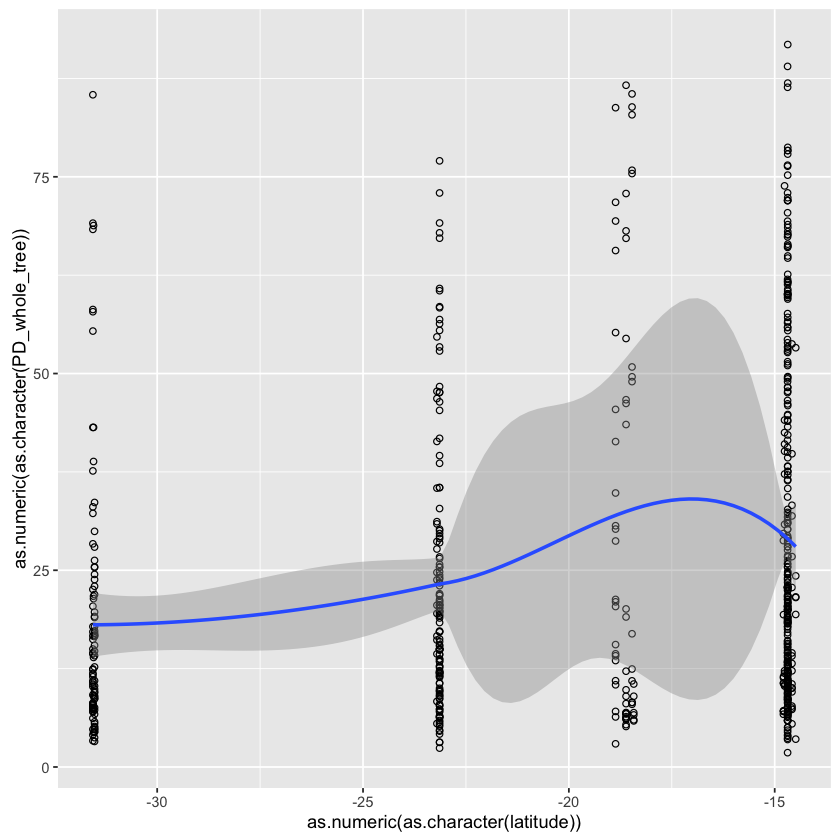

In [12]:
#PD_whole_tree~latitude
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region
#PD_whole_tree~latitude (non-linear)
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

# Something strange is happening at ~lat 18. This could be due to a non-even sample set from this location.

[1] 560

ERROR: Error in file(con, "rb"): cannot open the connection


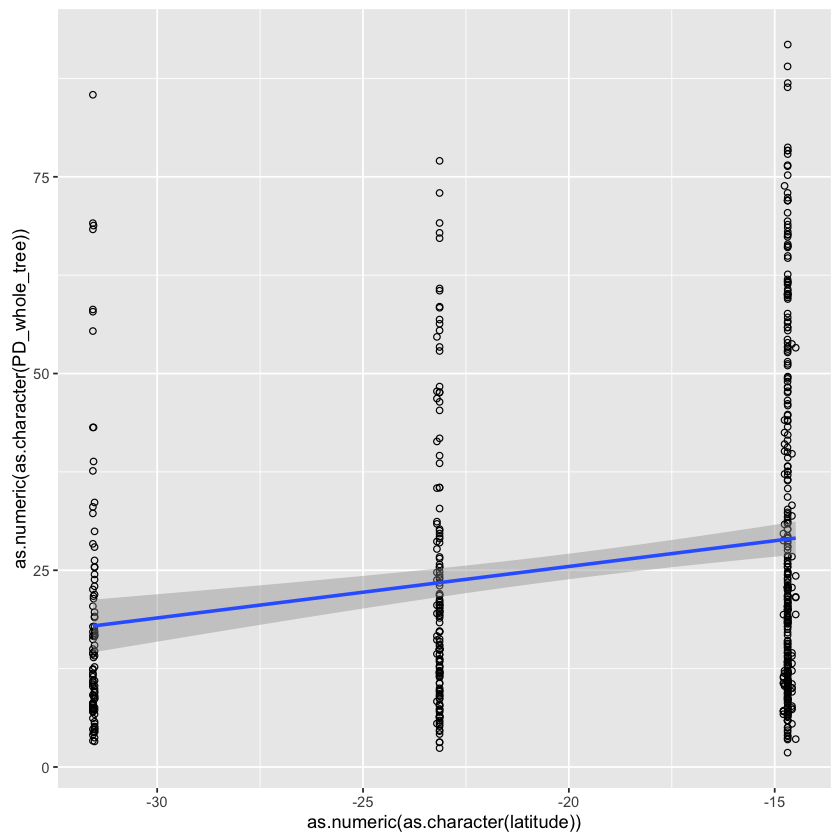

[1] "with lat 18:"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only$latitude)) and as.numeric(as.character(data_corals_only$PD_whole_tree))
t = 4.9931, df = 625, p-value = 7.718e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1193853 0.2700151
sample estimates:
      cor 
0.1958552 


[1] "without lat 18:"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_no_18$latitude)) and as.numeric(as.character(data_corals_only_no_18$PD_whole_tree))
t = 5.1387, df = 558, p-value = 3.832e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1320347 0.2903081
sample estimates:
      cor 
0.2125652 


ERROR: Error in file(con, "rb"): cannot open the connection


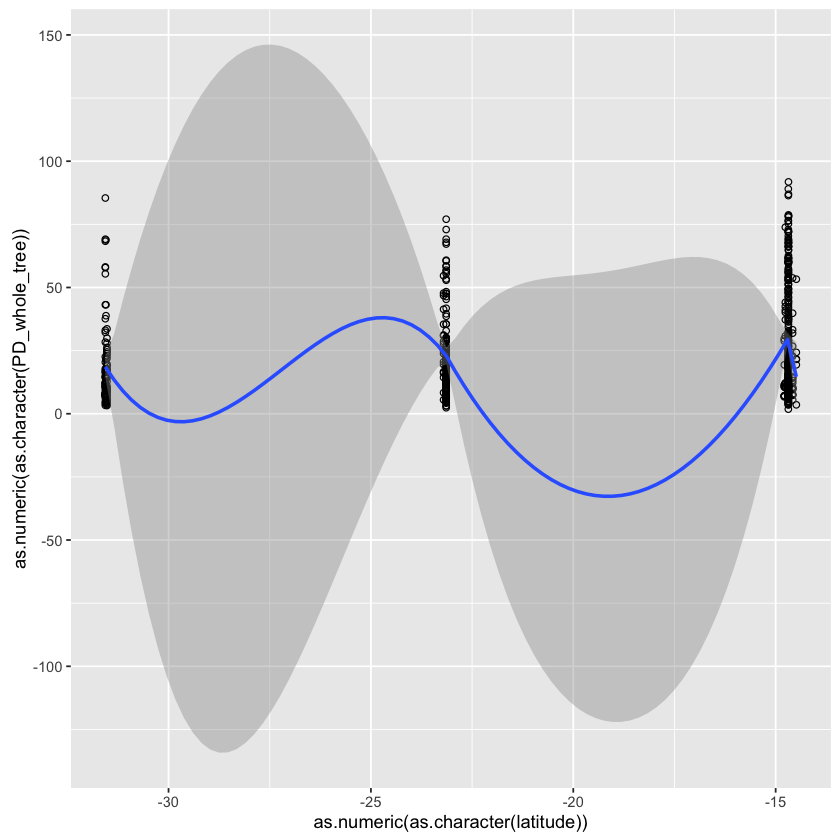

In [33]:
#Try without 18
subset(data, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_corals_only
subset(data_corals_only, latitude != "Unknown")->data_corals_only_no_unknown
subset(data_corals_only_no_unknown, as.numeric(as.character(latitude)) < -20 | as.numeric(as.character(latitude)) > -15)->data_corals_only_no_18
nrow(data_corals_only_no_18)

#PD_whole_tree~latitude
library(ggplot2)
ggplot(data_corals_only_no_18, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region
#PD_whole_tree~latitude (non-linear)
library(ggplot2)
ggplot(data_corals_only_no_18, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

print("with lat 18:")
cor.test(as.numeric(as.character(data_corals_only$latitude)), as.numeric(as.character(data_corals_only$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("without lat 18:")
cor.test(as.numeric(as.character(data_corals_only_no_18$latitude)), as.numeric(as.character(data_corals_only_no_18$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

# Latitude and PD_whole_tree appear to be correlated, but let's test this...

In [44]:
cor.test(as.numeric(as.character(data_corals_only$latitude)), as.numeric(as.character(data_corals_only$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)


	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only$latitude)) and as.numeric(as.character(data_corals_only$PD_whole_tree))
t = 4.9931, df = 625, p-value = 7.718e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1193853 0.2700151
sample estimates:
      cor 
0.1958552 


#Removing lat 18 doesn't make much difference...

# Are these correlations maintained across all compartments?

ERROR: Error in file(con, "rb"): cannot open the connection


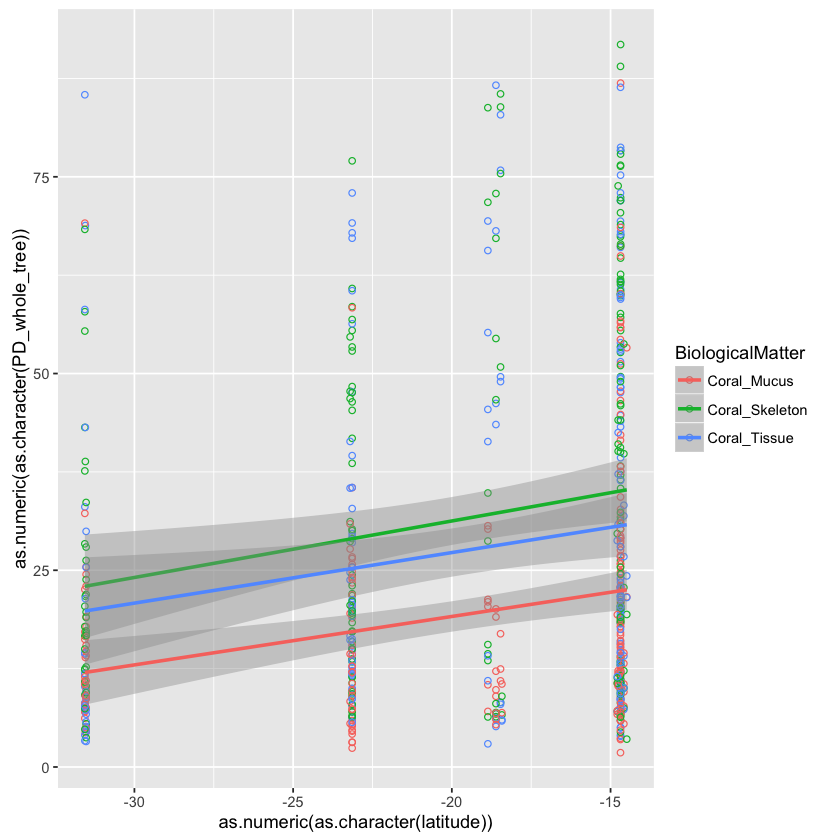

ERROR: Error in file(con, "rb"): cannot open the connection


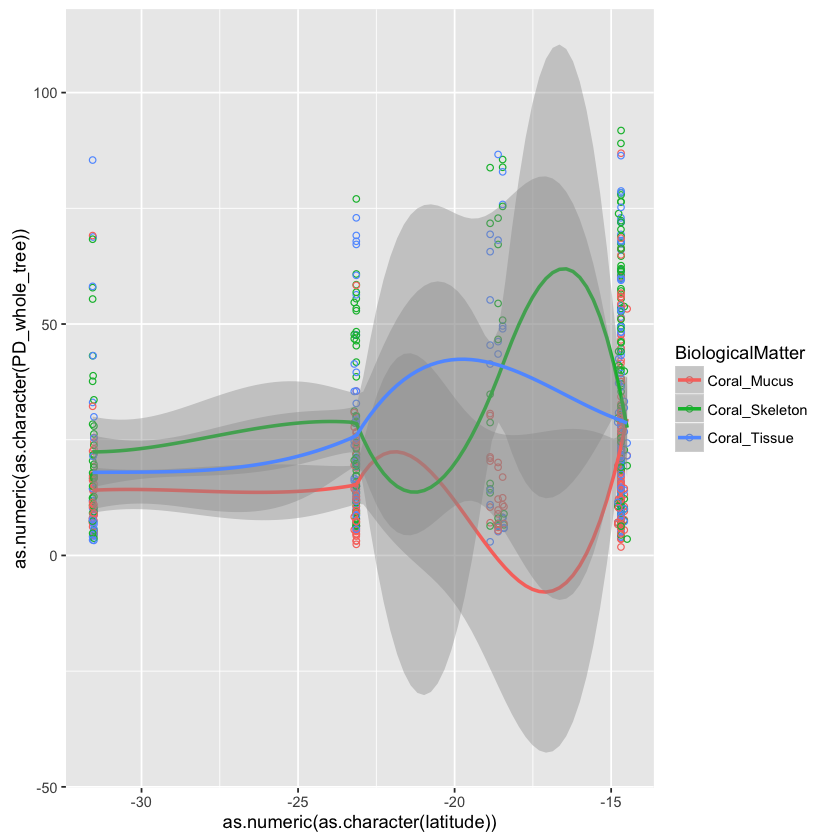

In [13]:
#PD_whole_tree~latitude, color=BiologicalMatter
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

#PD_whole_tree~latitude, color=BiologicalMatter (non-linear)
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

In [1]:
library(ggplot2)
library(svglite)
library(gridExtra)
library(grid)

# Statistically confirm that correlation holds for all compartments

In [48]:
subset(data_corals_only, BiologicalMatter == "Coral_Tissue")->data_corals_only_tissue
subset(data_corals_only, BiologicalMatter == "Coral_Mucus")->data_corals_only_mucus
subset(data_corals_only, BiologicalMatter == "Coral_Skeleton")->data_corals_only_skeleton

print("Tissue")
cor.test(as.numeric(as.character(data_corals_only_tissue$latitude)), as.numeric(as.character(data_corals_only_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_corals_only_mucus$latitude)), as.numeric(as.character(data_corals_only_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_corals_only_skeleton$latitude)), as.numeric(as.character(data_corals_only_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_tissue$latitude)) and as.numeric(as.character(data_corals_only_tissue$PD_whole_tree))
t = 2.4956, df = 201, p-value = 0.01338
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03652468 0.30381907
sample estimates:
      cor 
0.1733625 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_mucus$latitude)) and as.numeric(as.character(data_corals_only_mucus$PD_whole_tree))
t = 3.9406, df = 210, p-value = 0.0001107
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1323257 0.3835824
sample estimates:
     cor 
0.262396 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_skeleton$latitude)) and as.numeric(as.character(data_corals_only_skeleton$PD_whole_tree))
t = 2.8629, df = 210, p-value = 0.004624
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0606454 0.3201974
sample estimates:
      cor 
0.1938106 


ERROR: Error in file(con, "rb"): cannot open the connection


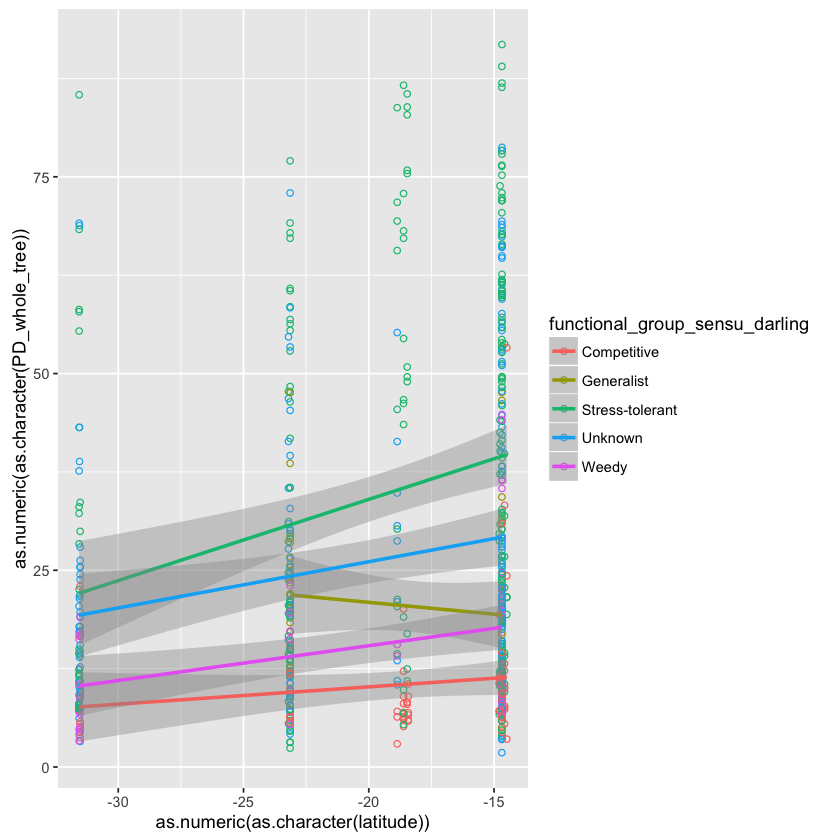

ERROR: Error in file(con, "rb"): cannot open the connection


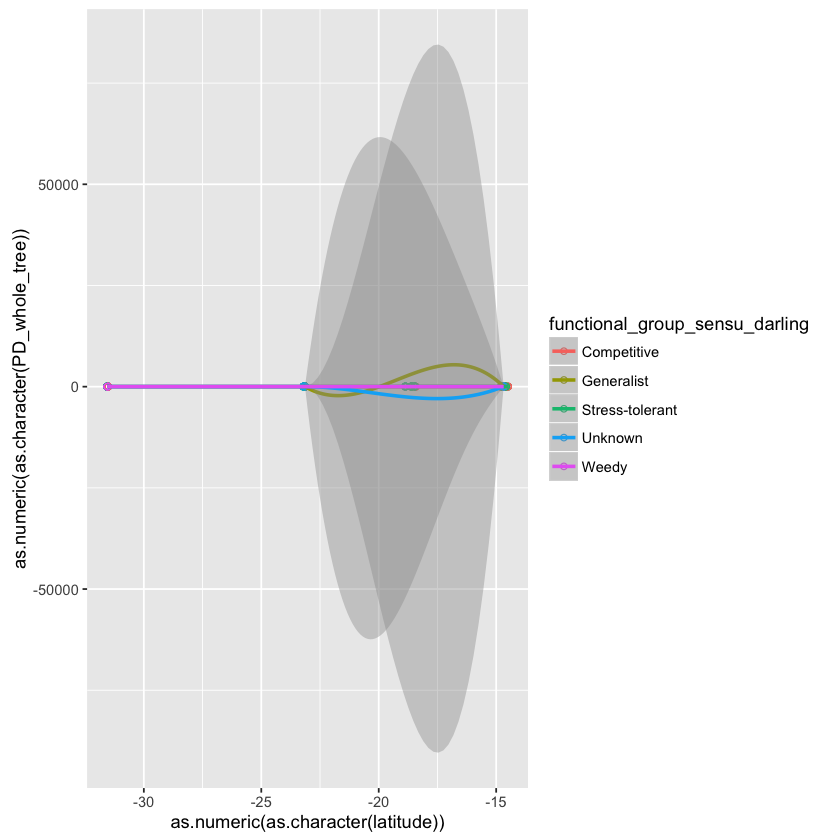

In [14]:
#PD_whole_tree~latitude, color=functional_group_sensu_darling
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

#PD_whole_tree~latitude, color=functional_group_sensu_darling (non-linear)
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region

# Effect looks stong in Stress-tolerant and Weedy, but let's test statistically

In [50]:
subset(data_corals_only, functional_group_sensu_darling == "Competitive")->data_corals_only_competitive
subset(data_corals_only, functional_group_sensu_darling == "Generalist")->data_corals_only_generalist
subset(data_corals_only, functional_group_sensu_darling == "Stress-tolerant")->data_corals_only_stress_tolerant
subset(data_corals_only, functional_group_sensu_darling == "Weedy")->data_corals_only_weedy
subset(data_corals_only, functional_group_sensu_darling == "Unknown")->data_corals_only_unknown

print("Competitive")
cor.test(as.numeric(as.character(data_corals_only_competitive$latitude)), as.numeric(as.character(data_corals_only_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_corals_only_generalist$latitude)), as.numeric(as.character(data_corals_only_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_corals_only_stress_tolerant$latitude)), as.numeric(as.character(data_corals_only_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_corals_only_weedy$latitude)), as.numeric(as.character(data_corals_only_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Unknown")
cor.test(as.numeric(as.character(data_corals_only_unknown$latitude)), as.numeric(as.character(data_corals_only_unknown$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_competitive$latitude)) and as.numeric(as.character(data_corals_only_competitive$PD_whole_tree))
t = 1.3658, df = 74, p-value = 0.1761
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07116783  0.36920690
sample estimates:
      cor 
0.1568037 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_generalist$latitude)) and as.numeric(as.character(data_corals_only_generalist$PD_whole_tree))
t = -0.77874, df = 45, p-value = 0.4402
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3895790  0.1777398
sample estimates:
       cor 
-0.1153127 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_stress_tolerant$latitude)) and as.numeric(as.character(data_corals_only_stress_tolerant$PD_whole_tree))
t = 4.1227, df = 258, p-value = 5.051e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1309181 0.3593961
sample estimates:
      cor 
0.2486122 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_weedy$latitude)) and as.numeric(as.character(data_corals_only_weedy$PD_whole_tree))
t = 3.0029, df = 65, p-value = 0.003793
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1187944 0.5436686
sample estimates:
      cor 
0.3490429 


[1] "Unknown"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_unknown$latitude)) and as.numeric(as.character(data_corals_only_unknown$PD_whole_tree))
t = 2.8477, df = 175, p-value = 0.004931
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06496137 0.34716969
sample estimates:
      cor 
0.2104455 


# Significant correlation for stress-tolerant and weedy (strongest for stress-tolerant). Also, for unknown

# How are compartments within stress-tolerant influenced by latitude?

ERROR: Error in file(con, "rb"): cannot open the connection


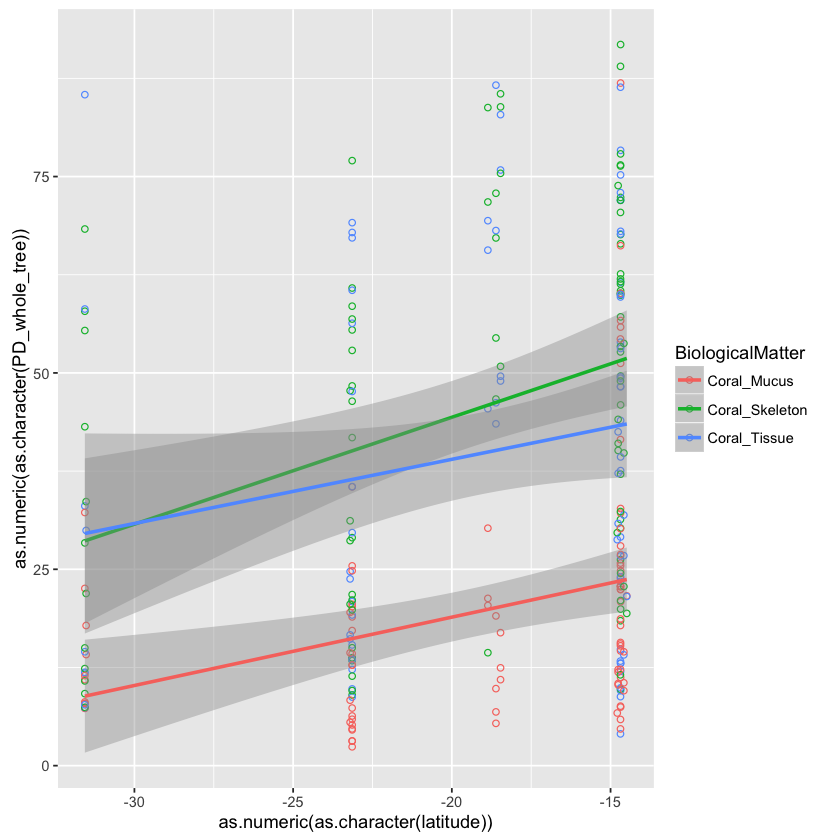

In [51]:
ggplot(data_corals_only_stress_tolerant, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Appears consistent across compartments
# Which taxa drive this?

ERROR: Error in file(con, "rb"): cannot open the connection


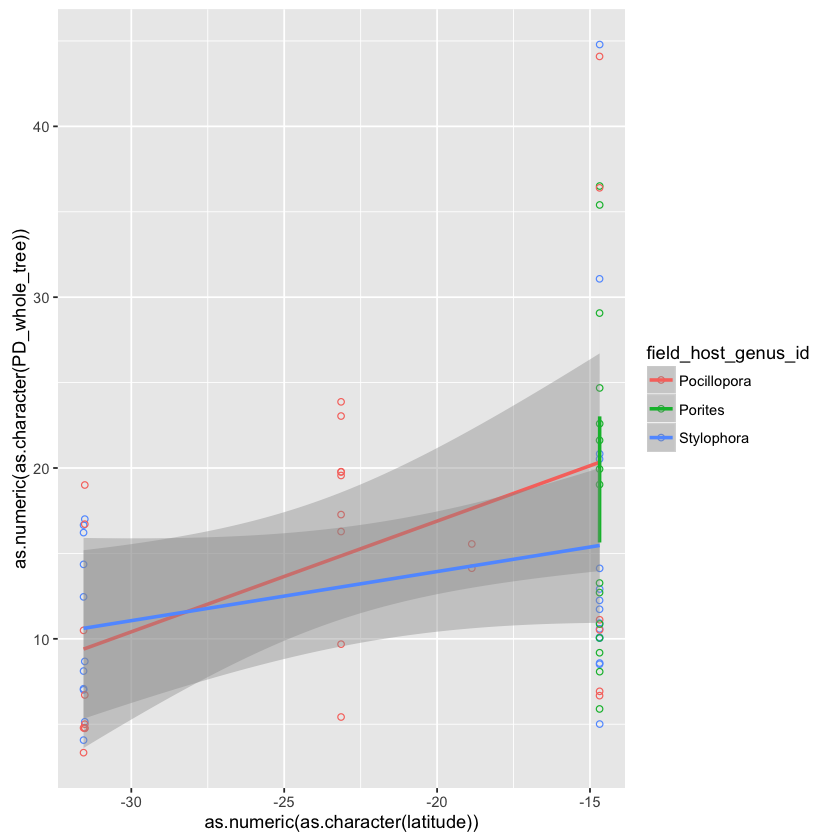

In [52]:
ggplot(data_corals_only_weedy, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

ERROR: Error in file(con, "rb"): cannot open the connection


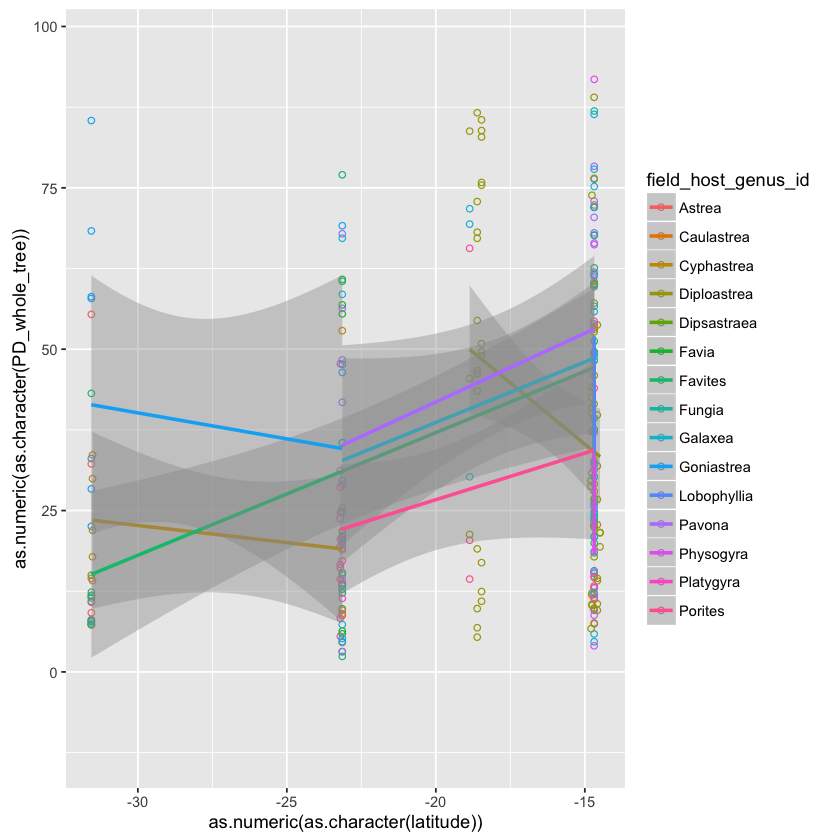

In [53]:
ggplot(data_corals_only_stress_tolerant, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Major drivers: 
# Stress-tolerant: Favites, Porites, Pavona & Lobophyllia
# Weedy: Porites & Stylophora

# How about Acropora?

[1] "Acropora"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_acropora$latitude)) and as.numeric(as.character(data_corals_only_acropora$PD_whole_tree))
t = 1.3658, df = 74, p-value = 0.1761
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07116783  0.36920690
sample estimates:
      cor 
0.1568037 


ERROR: Error in file(con, "rb"): cannot open the connection


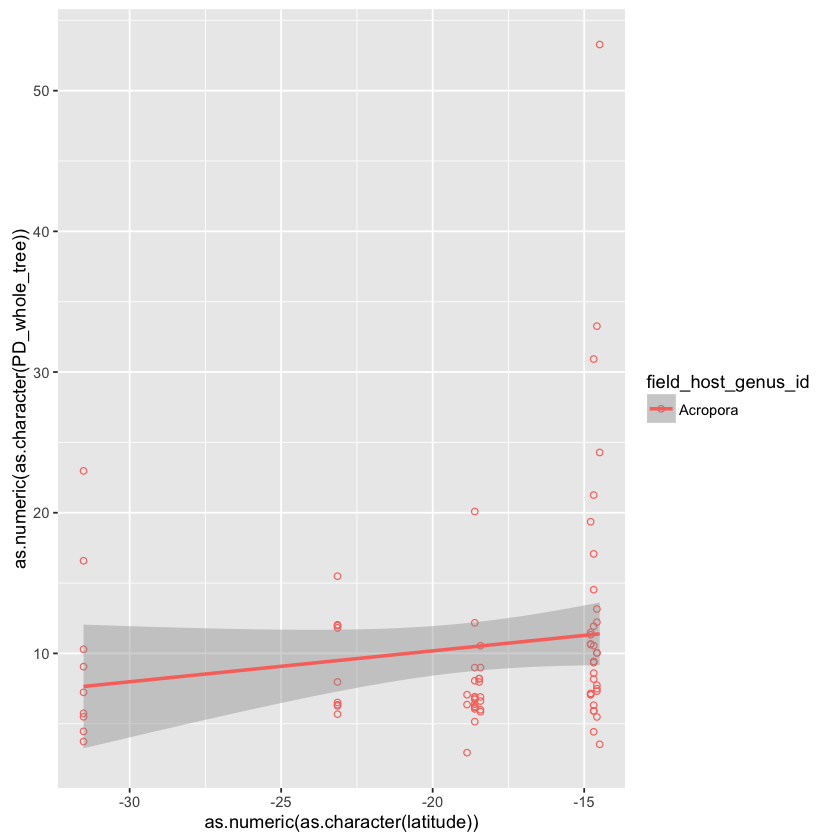

In [57]:
subset(data_corals_only, field_host_genus_id == "Acropora")->data_corals_only_acropora
ggplot(data_corals_only_acropora, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

print("Acropora")
cor.test(as.numeric(as.character(data_corals_only_acropora$latitude)), as.numeric(as.character(data_corals_only_acropora$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

# Could this simply be driven by temperature

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
: Removed 3 rows containing non-finite values (stat_smooth).Warning message:
: Removed 3 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


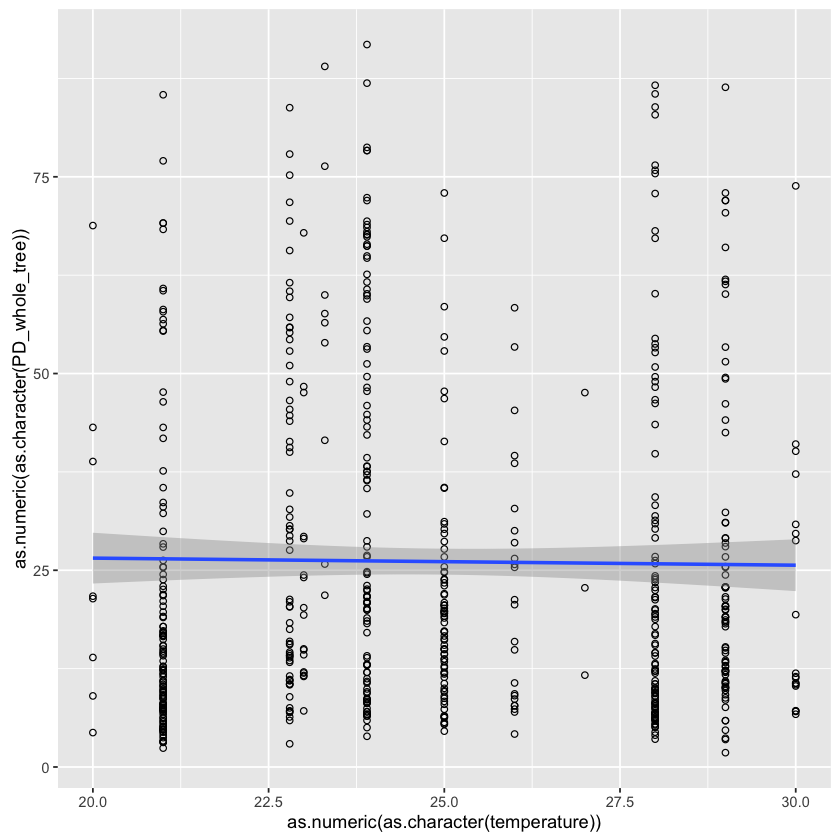

In [56]:
#PD_whole_tree~temperature
library(ggplot2)
ggplot(data_corals_only, aes(x=as.numeric(as.character(temperature)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Does not appear to be driven by temperature, but let's test this.

In [16]:
cor.test(as.numeric(as.character(data_no_unknown$temperature)), as.numeric(as.character(data_no_unknown$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)


	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown$temperature)) and as.numeric(as.character(data_no_unknown$PD_whole_tree))
t = 0.69029, df = 275, p-value = 0.4906
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07664097  0.15866795
sample estimates:
       cor 
0.04159019 


# Stats support that correlation is not driven by temperature

# So, richness is lower at high latitudes and in larger corals, but is the overall community composition the same (i.e. still converging on same overall community structure (1. as they get larger; 2. regardless of location)? 

# Next, we will explore patterns in beta diversity with size and latitude: see /3b_bdiv_australia_analysis/procedure/16S_procedure_3b_bdiv_australia_analysis.ipynb

# Could also run observation_metadata_correlation.py in QIIME to ensure consistency w/ R output.

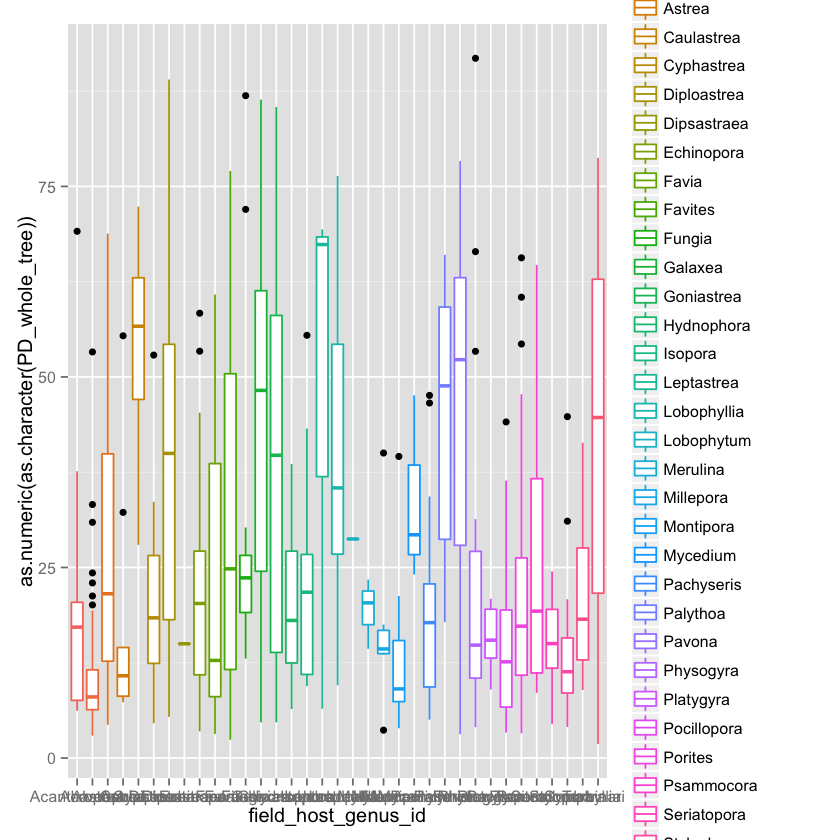

In [8]:
#PD_whole_tree~latitude
library(ggplot2)
ggplot(data_corals_only, aes(x=field_host_genus_id, y=as.numeric(as.character(PD_whole_tree)),color=field_host_genus_id)) +
    geom_boxplot()

# Equitability

In [1]:
setwd('..')
getwd()
library(ggplot2)

[1] "/Users/FJPollock/Dropbox/coral_microbiomes_postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat"

In [2]:
#Import the data
#microbiome_age_v3.csv contains data on equitability
read.csv('output/microbiome_age_v3.csv', header=T)->data
head(data)


X.SampleID equitability PD_whole_tree observed_otus
1 E1.10.Poc.dami.1.20140728.M    0.5717209       6.92672            41
2 E1.10.Poc.dami.1.20140728.S    0.5372823      11.11539            64
3 E1.10.Poc.dami.1.20140728.T    0.2109148      10.52376            37
4 E1.10.Poc.dami.1.20140731.M    0.1782701       6.67193            25
5 E1.10.Poc.dami.1.20140731.S    0.8036938      44.09446           328
6 E1.10.Poc.dami.1.20140731.T    0.4772607      36.40200           199
       Chao1                    SampleID BarcodeSequence runID
1   95.16667 E1.10.Poc.dami.1.20140728.M      CTCAAGAAGC ALVCP
2   95.50000 E1.10.Poc.dami.1.20140728.S      GGAACACAGG ALVCP
3   64.14286 E1.10.Poc.dami.1.20140728.T      TGGTTCGCTG ALVCP
4   52.50000 E1.10.Poc.dami.1.20140731.M      GCACTGTTGC ALVCP
5 1021.02632 E1.10.Poc.dami.1.20140731.S      AGGTAAGAGG ALVCP
6  702.75000 E1.10.Poc.dami.1.20140731.T      TCCTGACAGA ALVCP
          sequence_center_ID sequence_center_ID_base       collection_id
1 Pollock680_Poci_Muc_140728              Pollock680 Big_Vickie_20140728
2 Pollock682_Poci_Ske_140728              Pollock682 Big_Vickie_20140728
3 Pollock681_Poci_Tis_140728              Pollock681 Big_Vickie_20140728
4                 Pollock337              Pollock337  Horseshoe_20140731
5                 Pollock339              Pollock339  Horseshoe_20140731
6                 Pollock338              Pollock338  Horseshoe_20140731
     date concatenated_date  reef_name collection_time   collection_timestamp
1 7/28/14          20140728 Big_Vickie     11:22:00_AM 7/28/2014__11:22:00_AM
2 7/28/14          20140728 Big_Vickie     11:22:00_AM 7/28/2014__11:22:00_AM
3 7/28/14          20140728 Big_Vickie     11:22:00_AM 7/28/2014__11:22:00_AM
4 7/31/14          20140731  Horseshoe      3:30:00_PM  7/31/2014__3:30:00_PM
5 7/31/14          20140731  Horseshoe      3:30:00_PM  7/31/2014__3:30:00_PM
6 7/31/14          20140731  Horseshoe      3:30:00_PM  7/31/2014__3:30:00_PM
  daily_replicate  latitude longitude substrate  depth temperature salinity
1               1 -14.68463 145.44175  sediment 4.8768        22.8  Unknown
2               1 -14.68463 145.44175  sediment 4.8768        22.8  Unknown
3               1 -14.68463 145.44175  sediment 4.8768        22.8  Unknown
4               1 -14.68716 145.44449      rock  1.524        23.9  Unknown
5               1 -14.68716 145.44449      rock  1.524        23.9  Unknown
6               1 -14.68716 145.44449      rock  1.524        23.9  Unknown
   oxygen photosynthetically_active_radiation PAR_method dna_extracted
1 Unknown                             Unknown       buoy             y
2 Unknown                             Unknown       buoy             y
3 Unknown                             Unknown       buoy             y
4 Unknown                             Unknown       buoy             y
5 Unknown                             Unknown       buoy             y
6 Unknown                             Unknown       buoy             y
  physical_samp_avail_now                          physical_sample_location
1                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
2                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
3                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
4                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
5                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
6                       n Bourne_Lab,_AIMS,_Australia_cannot_be_reextracted
     sample_type       env_matter               local_colony_name
1    Coral_Mucus            mucus Pocillopora_damicornis_20140728
2 Coral_Skeleton organic_material Pocillopora_damicornis_20140728
3   Coral_Tissue organic_material Pocillopora_damicornis_20140728
4    Coral_Mucus            mucus Pocillopora_damicornis_20140731
5 Coral_Skeleton organic_material Pocillopora_damicornis_20140731
6   Coral_Tissue organic_material Pocillopora_damicornis_20140731
 

In [3]:
#remove Unknown size
subset(data,colony_width_max != "Unknown")->data_no_unknown_size

In [5]:
#Define function to ensure plots are a consistent size (useful for overlay, multipanels, etc)
set_panel_size_wide <- function(p=NULL, g=ggplotGrob(p), file=NULL, 
                           margin = unit(1,"mm"),
                           width=unit(16, "cm"), 
                           height=unit(8, "cm")){

  panels <- grep("panel", g$layout$name)
  panel_index_w<- unique(g$layout$l[panels])
  panel_index_h<- unique(g$layout$t[panels])
  nw <- length(panel_index_w)
  nh <- length(panel_index_h)

if(getRversion() < "3.3.0"){

   # the following conversion is necessary
   # because there is no `[<-`.unit method
   # so promoting to unit.list allows standard list indexing
   g$widths <- grid:::unit.list(g$widths)
   g$heights <- grid:::unit.list(g$heights)

   g$widths[panel_index_w] <-  rep(list(width),  nw)
   g$heights[panel_index_h] <- rep(list(height), nh)

} else {

   g$widths[panel_index_w] <-  rep(width,  nw)
   g$heights[panel_index_h] <- rep(height, nh)

}

  if(!is.null(file))
    ggsave(file, g, 
           width = convertWidth(sum(g$widths) + margin, 
                                unitTo = "in", valueOnly = TRUE),
           height = convertHeight(sum(g$heights) + margin,  
                                  unitTo = "in", valueOnly = TRUE))

  g
}

[1] "Pearson's Product Moment Correlation"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_size$equitability))
t = -2.913, df = 642, p-value = 0.003704
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.18979882 -0.03728333
sample estimates:
      cor 
-0.114214 


ERROR: Error in file(con, "rb"): cannot open the connection


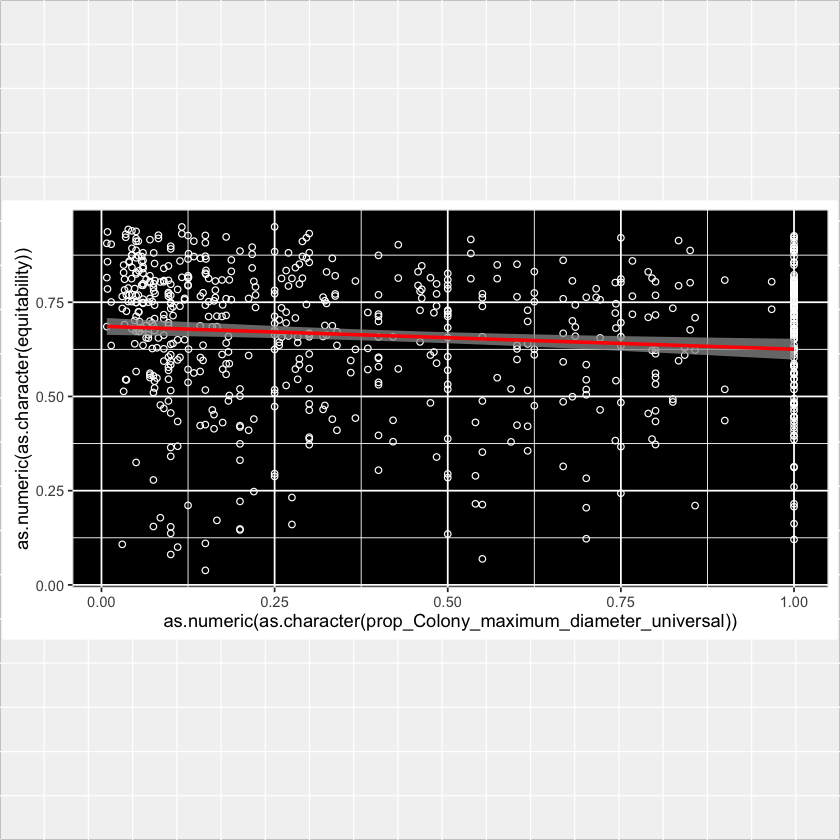

In [6]:
#Equitability vs. size (linear)

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(equitability)))) +
    geom_point(shape=1,colour="white") +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE,    # Add shaded confidence region               
                color="red", alpha = 0.75) +    # Add shaded confidence region
#    scale_colour_gradient(high="red",low="blue") +
    theme(legend.position="bottom", panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size_wide(plot1)

#Save plot
#ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/pd_whole_tree_size_no_color.svg")

#View plot
plot(g1)

print("Pearson's Product Moment Correlation")
cor.test(as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_size$equitability)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

[1] "Pearson's Product Moment Correlation"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_size$equitability))
t = -2.913, df = 642, p-value = 0.003704
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.18979882 -0.03728333
sample estimates:
      cor 
-0.114214 


ERROR: Error in file(con, "rb"): cannot open the connection


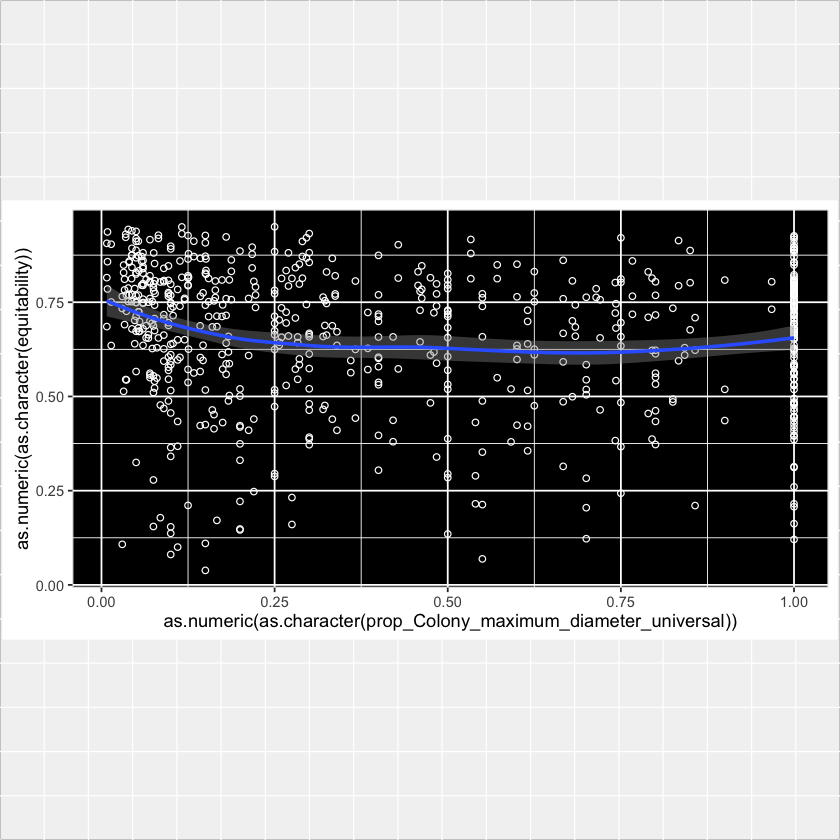

In [7]:
#Equitability vs. size (non-linear)

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(equitability)))) +
    geom_point(shape=1,colour="white") +
    geom_smooth() +    # Add shaded confidence region
#    scale_colour_gradient(high="red",low="blue") +
    theme(legend.position="bottom", panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size_wide(plot1)

#Save plot
#ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/pd_whole_tree_size_no_color.svg")

#View plot
plot(g1)

print("Pearson's Product Moment Correlation")
cor.test(as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_size$equitability)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)